# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [37]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
#separating byte files and asm files 

source = 'train'
destination = 'byteFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination):
    os.makedirs(destination)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    os.rename(source,'asmFiles')
    source='asmFiles'
    data_files = os.listdir(source)
    for file in data_files:
        if (file.endswith("bytes")):
            shutil.move(source+"/"+file,destination)

<h2>3.1. Distribution of malware classes in whole data set </h2>

<IPython.core.display.Javascript object>


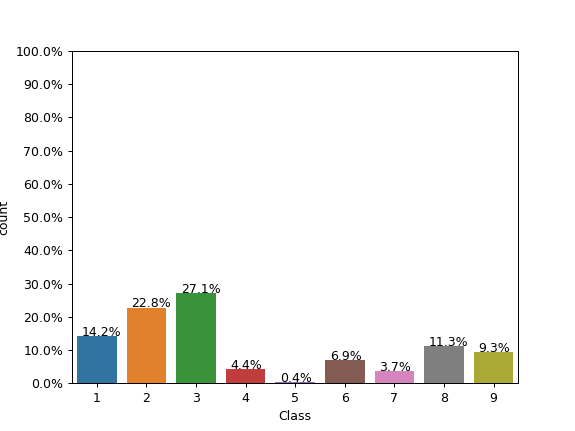

In [3]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
    #print('{:.1f}%'.format(100*p.get_height()/total),p.get_x(),p.get_height())
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [5]:
#file sizes of byte files
from tqdm import tqdm
Y=pd.read_csv("trainLabels.csv")# Loading labels of train dataset
files=os.listdir('byteFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in tqdm(files):
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

100%|███████████████████████████████████████████████████████████████████████████| 10868/10868 [00:13<00:00, 781.14it/s]


                     ID      size  Class
0  01azqd4InC7m9JpocGv5  4.234863      9
1  01IsoiSMh5gxyDYTl4CB  5.538818      2
2  01jsnpXSAlgw6aPeDxrU  3.887939      9
3  01kcPWA9K2BOxQeS5Rju  0.574219      1
4  01SuzwMJEIXsK7A8dQbl  0.370850      8


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


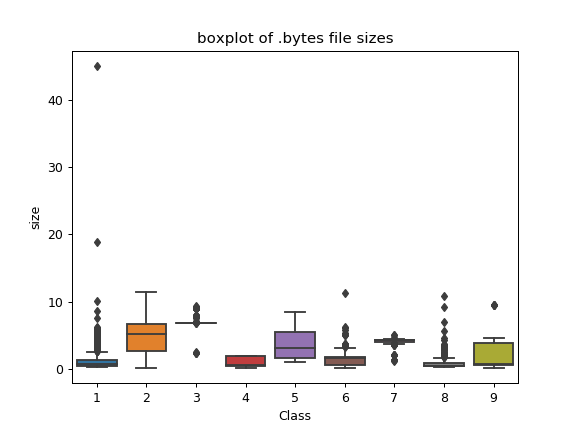

In [4]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

In [5]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000
from tqdm import tqdm
files = os.listdir('byteFiles')
filenames=[]
array=[]
for file in tqdm(files):
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file+'.bytes',"r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file+'.bytes')
        text_file.close()

files = os.listdir('byteFiles')
filenames2=[]
feature_matrix = np.zeros((len(files),257),dtype=int)



In [6]:
#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is unigram bag of words
k=0
byte_feature_file=open('result.csv','w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
#byte_feature_file.write(","+"\n")
for file in files:
    filenames2.append(file)
    byte_feature_file.write(file.split(".")[0]+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code=='??':
                        feature_matrix[k][256]+=1
                    else:
                        feature_matrix[k][int(hex_code,16)]+=1
        byte_flie.close()
    for i in feature_matrix[k]:
        byte_feature_file.write(str(i)+",")
        
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()

In [23]:
byte_features=pd.read_csv("result.csv")
byte_features.head(5)

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...    f7    f8    f9    fa    fb    fc    fd     fe     ff     ??  
0  2965  ...  2804  3687  3101  3211  3097  2758  3099   2759   5753   1824  
1  9291  ...   451  6536   439   281   302  7639   518  17001  54902   8588  
2  9107  ...  2325  2358  2242  2885  2863  2471  2786   2680  49144    468  
3  1078  ...   478   873   485   462   516  1133   471    761   7998  13940  
4   422  ...   847   947   350   209   239   653   221    242   2199   9008  

[5 rows x 258 columns]

In [24]:
result = pd.merge(byte_features, data_size_byte,on='ID', how='left')
result.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...    f9    fa    fb    fc    fd     fe     ff     ??      size  \
0  2965  ...  3101  3211  3097  2758  3099   2759   5753   1824  4.234863   
1  9291  ...   439   281   302  7639   518  17001  54902   8588  5.538818   
2  9107  ...  2242  2885  2863  2471  2786   2680  49144    468  3.887939   
3  1078  ...   485   462   516  1133   471    761   7998  13940  0.574219   
4   422  ...   350   209   239   653   221    242   2199   9008  0.370850   

   Class  
0      9  
1      2  
2      9  
3      1  
4      8  

[5 rows x 260 columns]

In [25]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(result)

In [26]:
data_y = result['Class']
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...        f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147  0.001329   
2  0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777  0.012604   
3  0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886  0.002272   
4  0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121236      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

<h3>For Bigram Features</h3>

In [29]:
# Loading csv file of top 2000 bigram byte features based on idf values.
bigram_byte_features = pd.read_csv("result3.csv")
print(bigram_byte_features.shape)
result2 = pd.merge(bigram_byte_features,result ,on='ID', how='right')
result2.head()

(10867, 4002)


ID  10 ??  22 ??  ?? 70  ?? 92  ?? 68  ?? 88  ?? 72  \
0  01IsoiSMh5gxyDYTl4CB    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1  01jsnpXSAlgw6aPeDxrU    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2  01kcPWA9K2BOxQeS5Rju    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3  01SuzwMJEIXsK7A8dQbl    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4  02IOCvYEy8mjiuAQHax3    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   ?? 64  ?? 58  ...        f9        fa        fb        fc        fd  \
0    0.0    0.0  ...  0.001920  0.001147  0.001329  0.087867  0.002432   
1    0.0    0.0  ...  0.009804  0.011777  0.012604  0.028423  0.013080   
2    0.0    0.0  ...  0.002121  0.001886  0.002272  0.013032  0.002211   
3    0.0    0.0  ...  0.001530  0.000853  0.001052  0.007511  0.001038   
4    0.0    0.0  ...  0.001290  0.001359  0.001514  0.003738  0.001559   

         fe        ff        ??      size  Class  
0  0.088411  0.074851  0.000606  0.121236      2  
1  0.013937  0.067001  0.000033  0.084499      9  
2  0.003957  0.010904  0.000984  0.010759      1  
3  0.001258  0.002998  0.000636  0.006233      8  
4  0.001669  0.000549  0.004305  0.012888      6  

[5 rows x 4261 columns]

In [13]:
# Normalizing the datset
result1 = normalize(result1)

In [14]:
data_y = result1['Class']
result1.head()

ID  10 ??  22 ??  ?? 70  ?? 92  ?? 68  ?? 88  ?? 72  \
0  01IsoiSMh5gxyDYTl4CB    NaN    0.0    0.0    0.0    0.0    0.0    0.0   
1  01jsnpXSAlgw6aPeDxrU    NaN    0.0    0.0    0.0    0.0    0.0    0.0   
2  01kcPWA9K2BOxQeS5Rju    NaN    0.0    0.0    0.0    0.0    0.0    0.0   
3  01SuzwMJEIXsK7A8dQbl    NaN    0.0    0.0    0.0    0.0    0.0    0.0   
4  02IOCvYEy8mjiuAQHax3    NaN    0.0    0.0    0.0    0.0    0.0    0.0   

   ?? 64  ?? 58  ...        f9        fa        fb        fc        fd  \
0    0.0    0.0  ...  0.001920  0.001147  0.001329  0.087867  0.002432   
1    0.0    0.0  ...  0.009804  0.011777  0.012604  0.028423  0.013080   
2    0.0    0.0  ...  0.002121  0.001886  0.002272  0.013032  0.002211   
3    0.0    0.0  ...  0.001530  0.000853  0.001052  0.007511  0.001038   
4    0.0    0.0  ...  0.001290  0.001359  0.001514  0.003738  0.001559   

         fe        ff        ??      size  Class  
0  0.088411  0.074851  0.000606  0.121236      2  
1  0.013937  0.067001  0.000033  0.084499      9  
2  0.003957  0.010904  0.000984  0.010759      1  
3  0.001258  0.002998  0.000636  0.006233      8  
4  0.001669  0.000549  0.004305  0.012888      6  

[5 rows x 4261 columns]

<h3>3.2.4 Multivariate Analysis </h3>

<IPython.core.display.Javascript object>


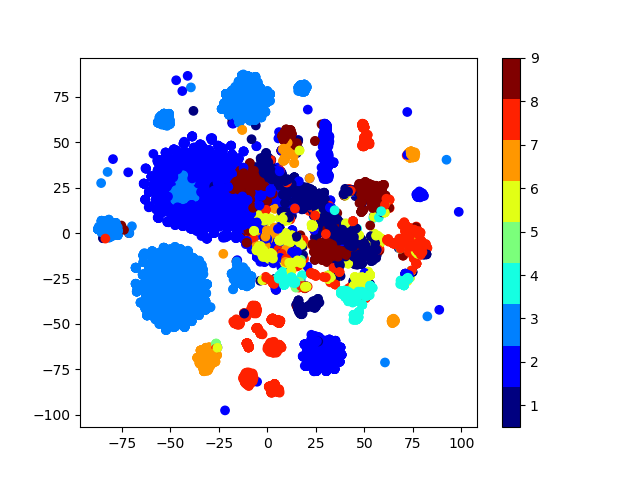

In [27]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


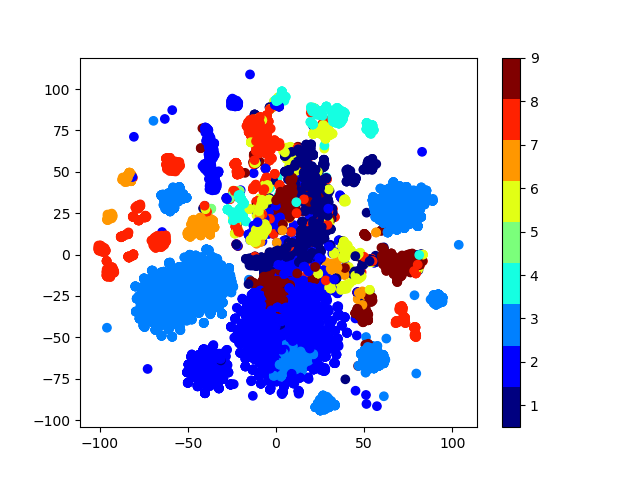

In [28]:
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [9]:
data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [10]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


<IPython.core.display.Javascript object>


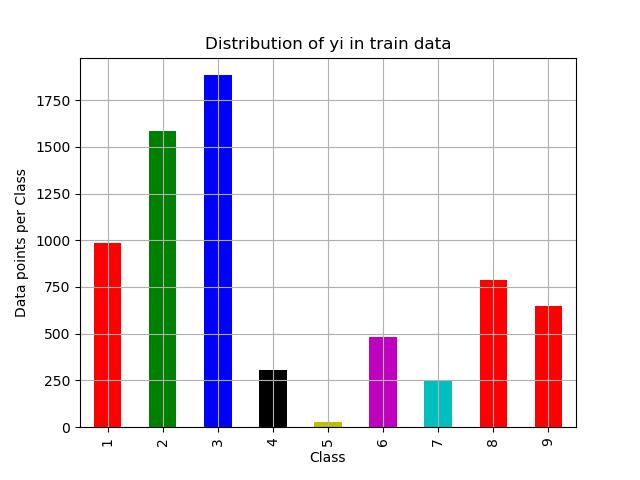

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


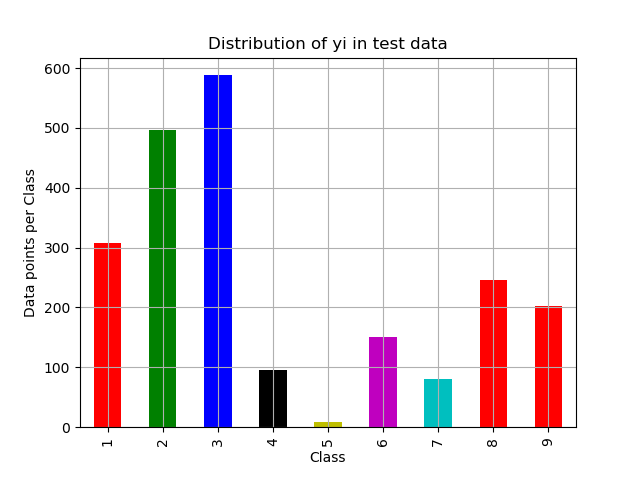

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


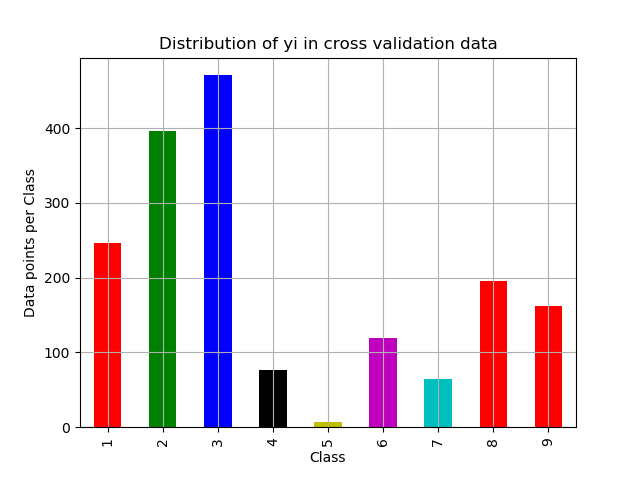

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [12]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sortlevel()
test_class_distribution = y_test.value_counts().sortlevel()
cv_class_distribution = y_cv.value_counts().sortlevel()

my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [35]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1>4. Machine Learning Models</h1>

<h2>4.1. Machine Leaning Models on bytes files</h2>

<h3>4.1.1. Random Model</h3>

Log loss on Cross Validation Data using Random Model 2.45615644965
Log loss on Test Data using Random Model 2.48503905509
Number of misclassified points  88.5004599816
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


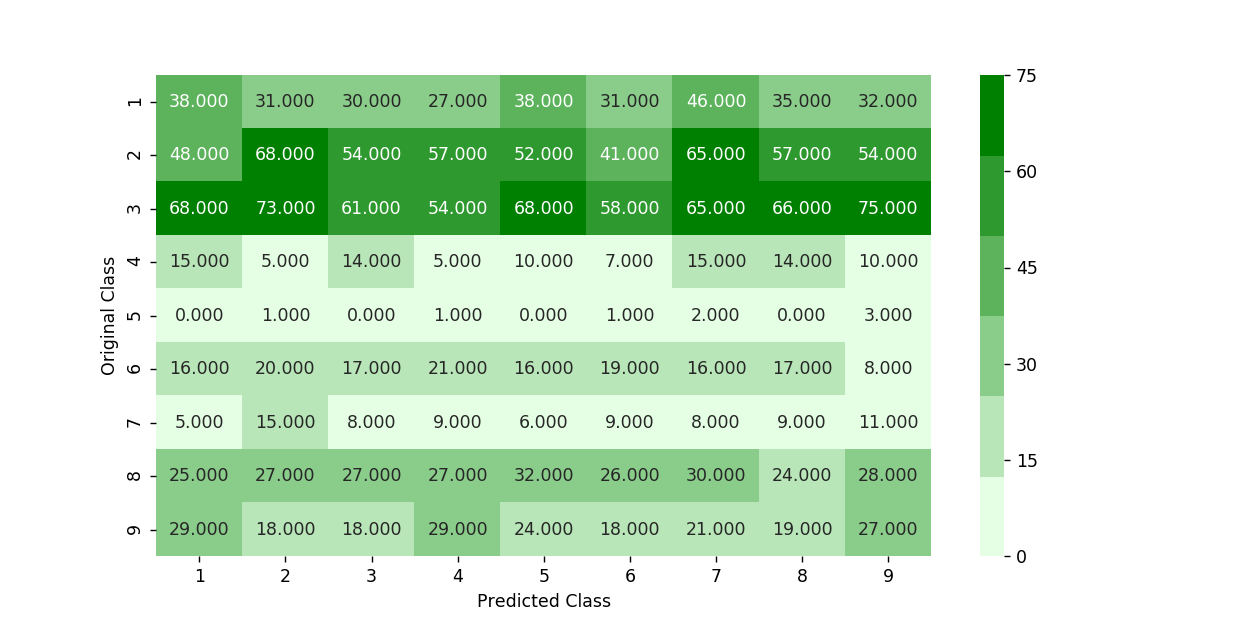

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


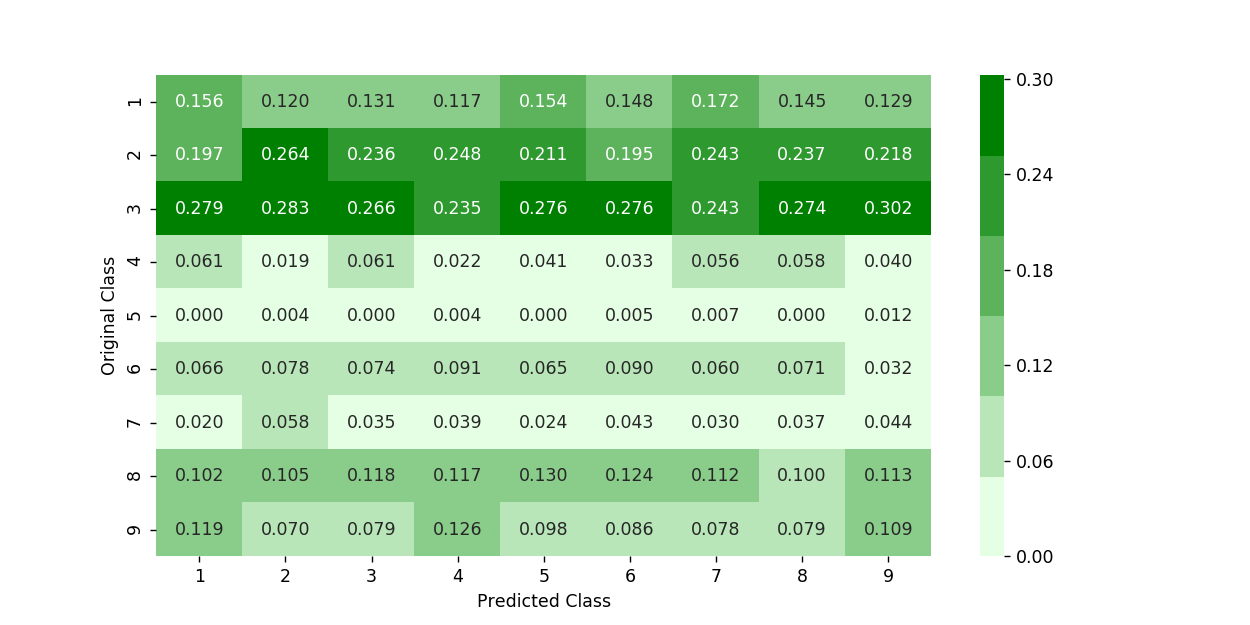

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


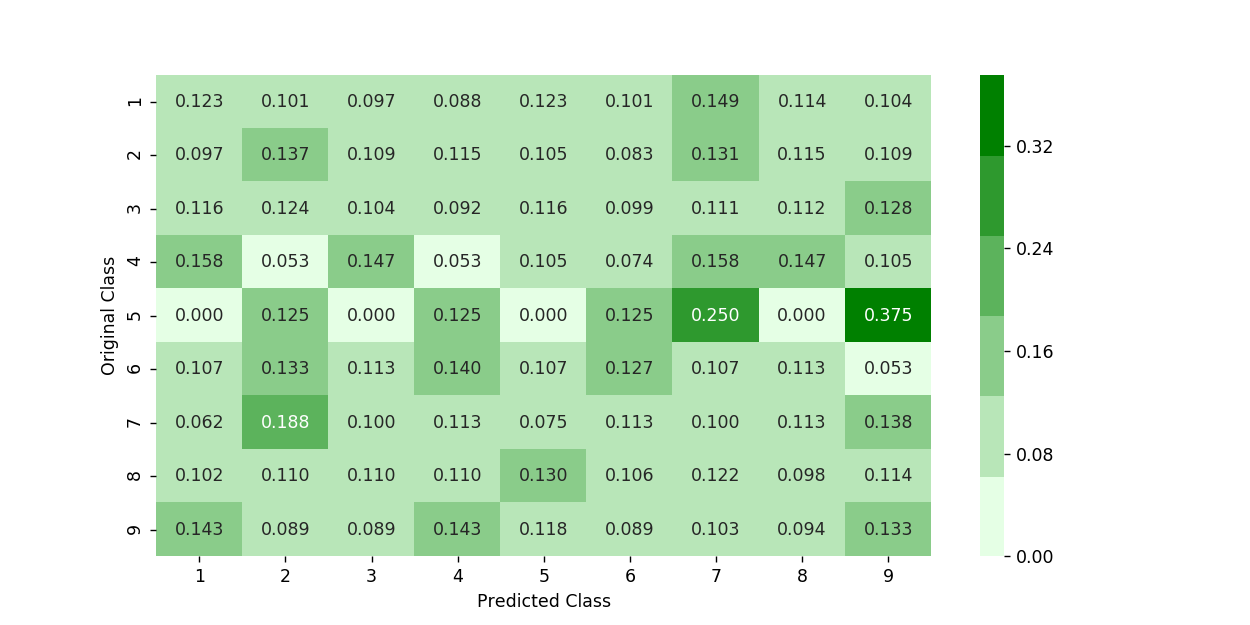

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [62]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3>4.1.2. K Nearest Neighbour Classification</h3>

log_loss for k =  1 is 0.225386237304
log_loss for k =  3 is 0.230795229168
log_loss for k =  5 is 0.252421408646
log_loss for k =  7 is 0.273827486888
log_loss for k =  9 is 0.286469181555
log_loss for k =  11 is 0.29623391147
log_loss for k =  13 is 0.307551203154


<IPython.core.display.Javascript object>


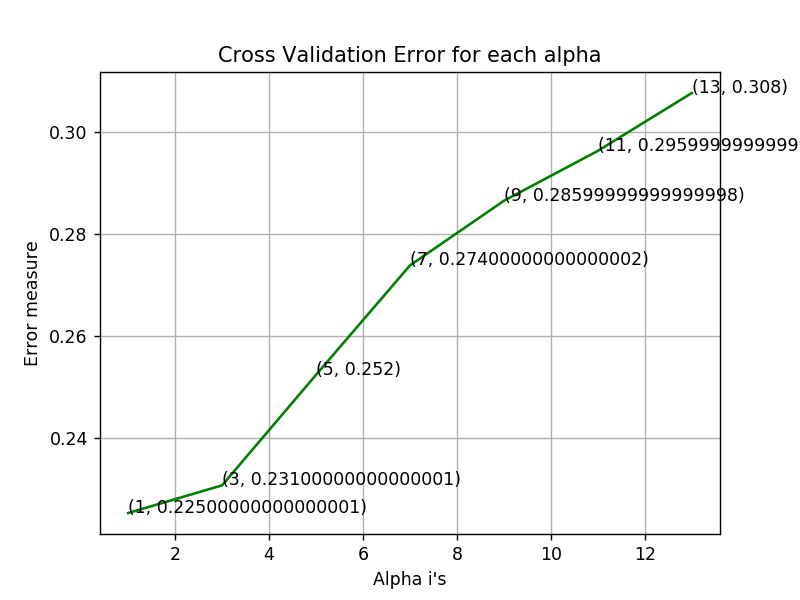

For values of best alpha =  1 The train log loss is: 0.0782947669247
For values of best alpha =  1 The cross validation log loss is: 0.225386237304
For values of best alpha =  1 The test log loss is: 0.241508604195
Number of misclassified points  4.50781968721
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


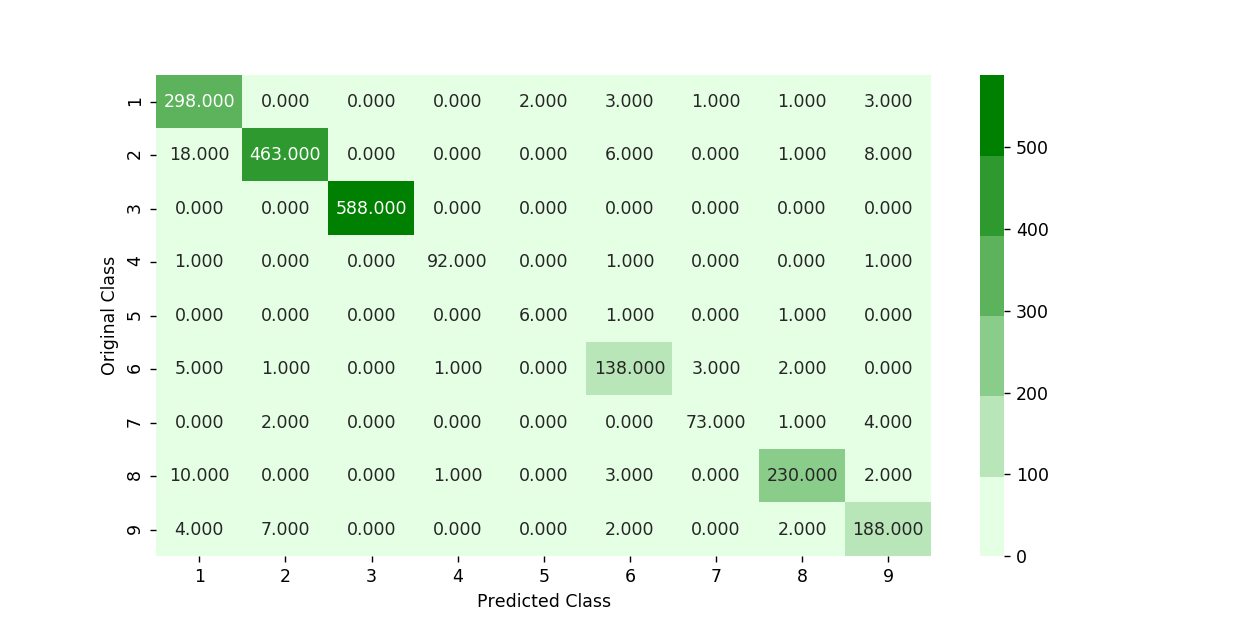

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


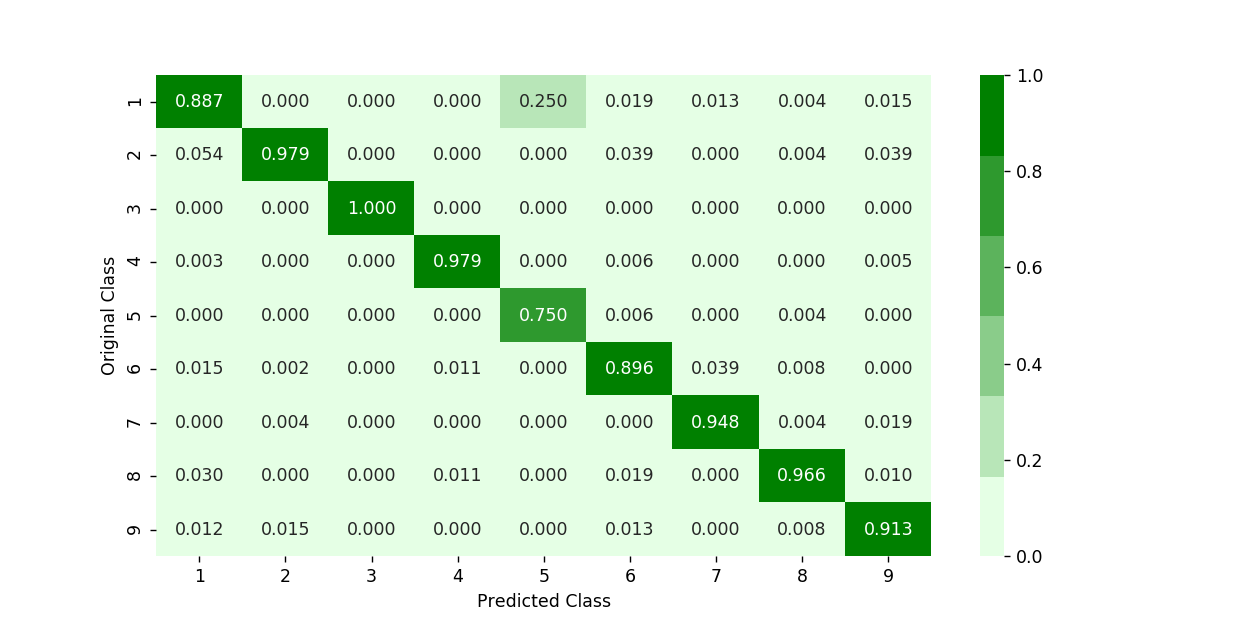

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


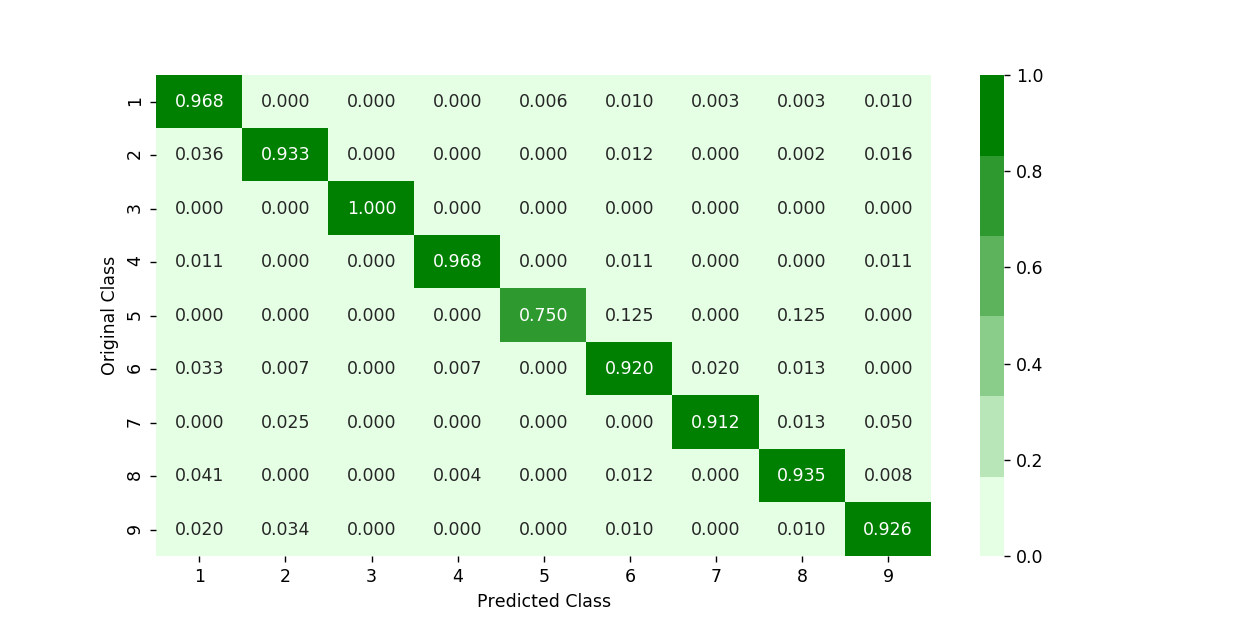

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [68]:
---------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------




# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
-----------------------------------
  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.3. Logistic Regression</h3>

log_loss for c =  1e-05 is 1.56916911178
log_loss for c =  0.0001 is 1.57336384417
log_loss for c =  0.001 is 1.53598598273
log_loss for c =  0.01 is 1.01720972418
log_loss for c =  0.1 is 0.857766083873
log_loss for c =  1 is 0.711154393309
log_loss for c =  10 is 0.583929522635
log_loss for c =  100 is 0.549929846589
log_loss for c =  1000 is 0.624746769121


<IPython.core.display.Javascript object>


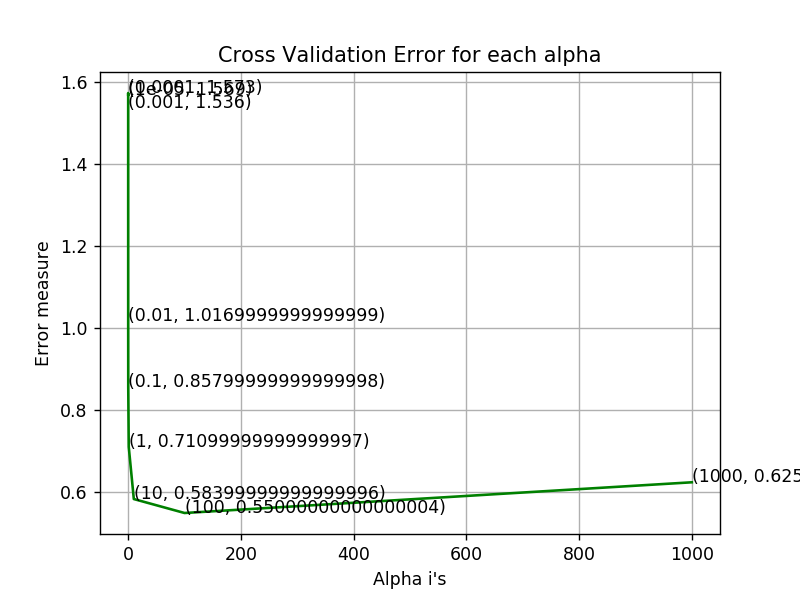

log loss for train data 0.498923428696
log loss for cv data 0.549929846589
log loss for test data 0.528347316704
Number of misclassified points  12.3275068997
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


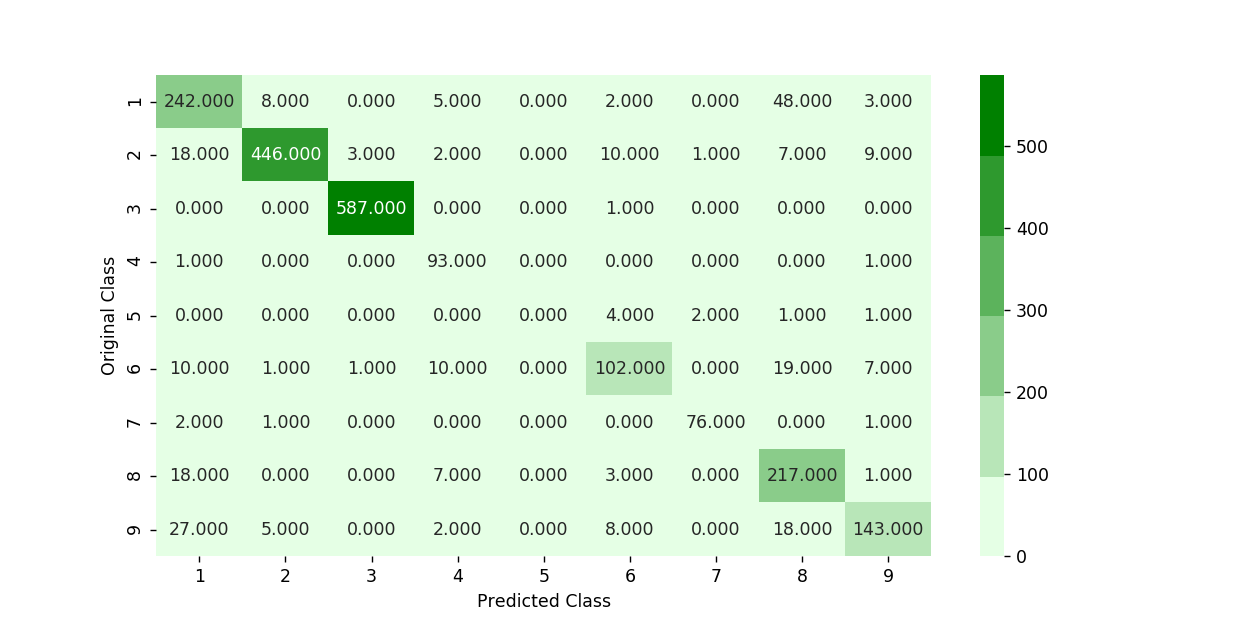

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


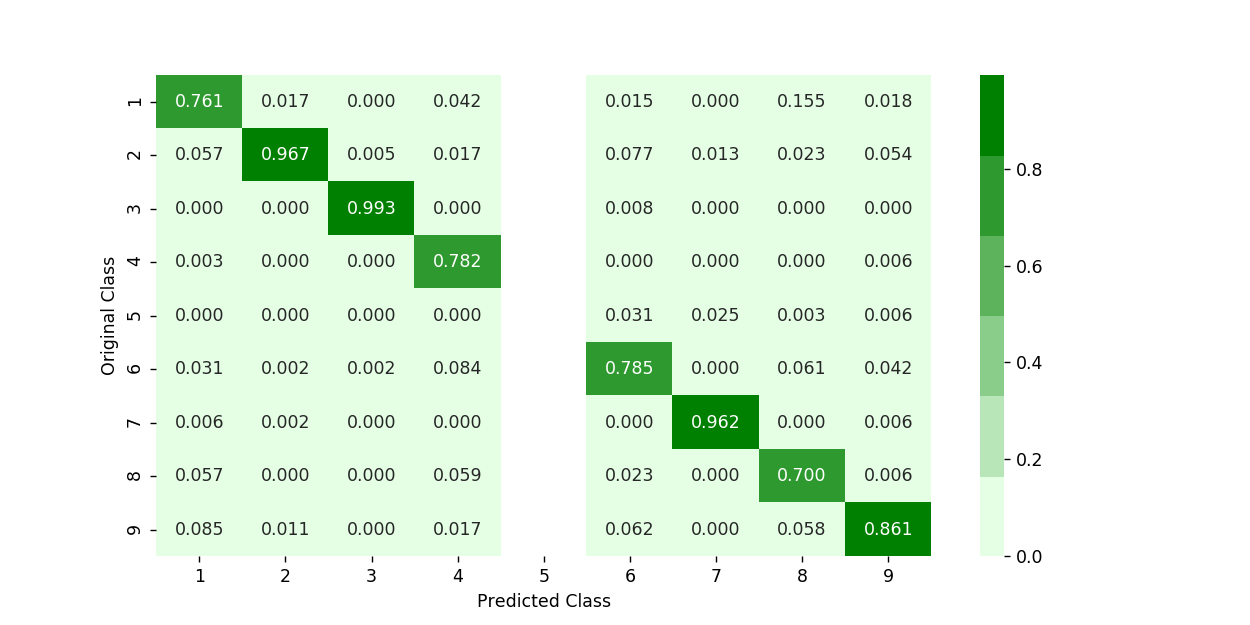

Sum of columns in precision matrix [  1.   1.   1.   1.  nan   1.   1.   1.   1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


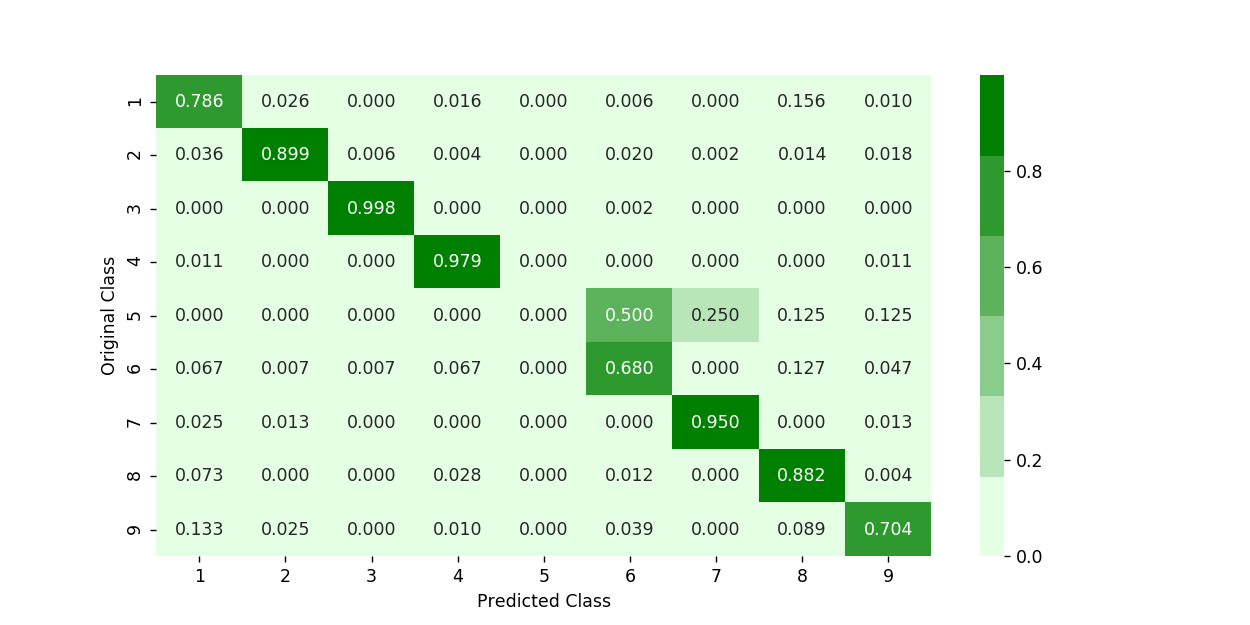

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [71]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> 4.1.4. Random Forest Classifier </h3>

log_loss for c =  10 is 0.106357709164
log_loss for c =  50 is 0.0902124124145
log_loss for c =  100 is 0.0895043339776
log_loss for c =  500 is 0.0881420869288
log_loss for c =  1000 is 0.0879849524621
log_loss for c =  2000 is 0.0881566647295
log_loss for c =  3000 is 0.0881318948443


<IPython.core.display.Javascript object>


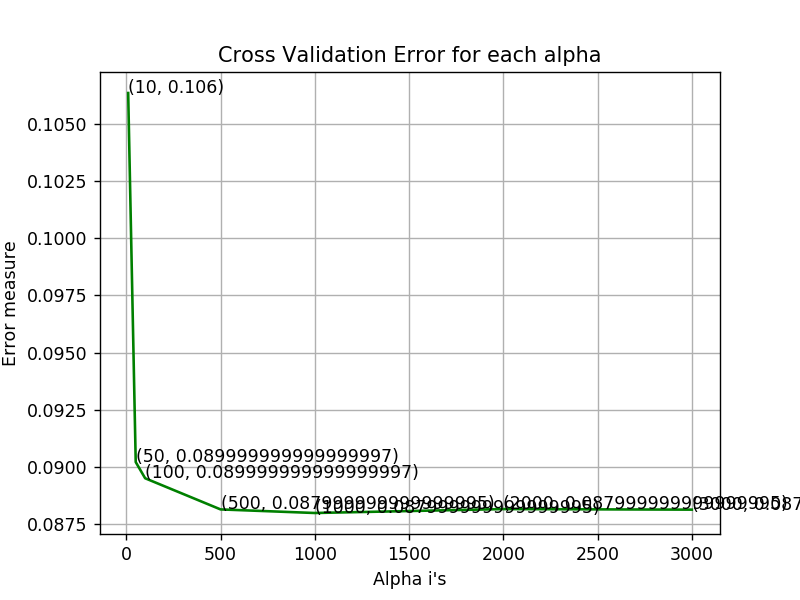

For values of best alpha =  1000 The train log loss is: 0.0266476291801
For values of best alpha =  1000 The cross validation log loss is: 0.0879849524621
For values of best alpha =  1000 The test log loss is: 0.0858346961407
Number of misclassified points  2.02391904324
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


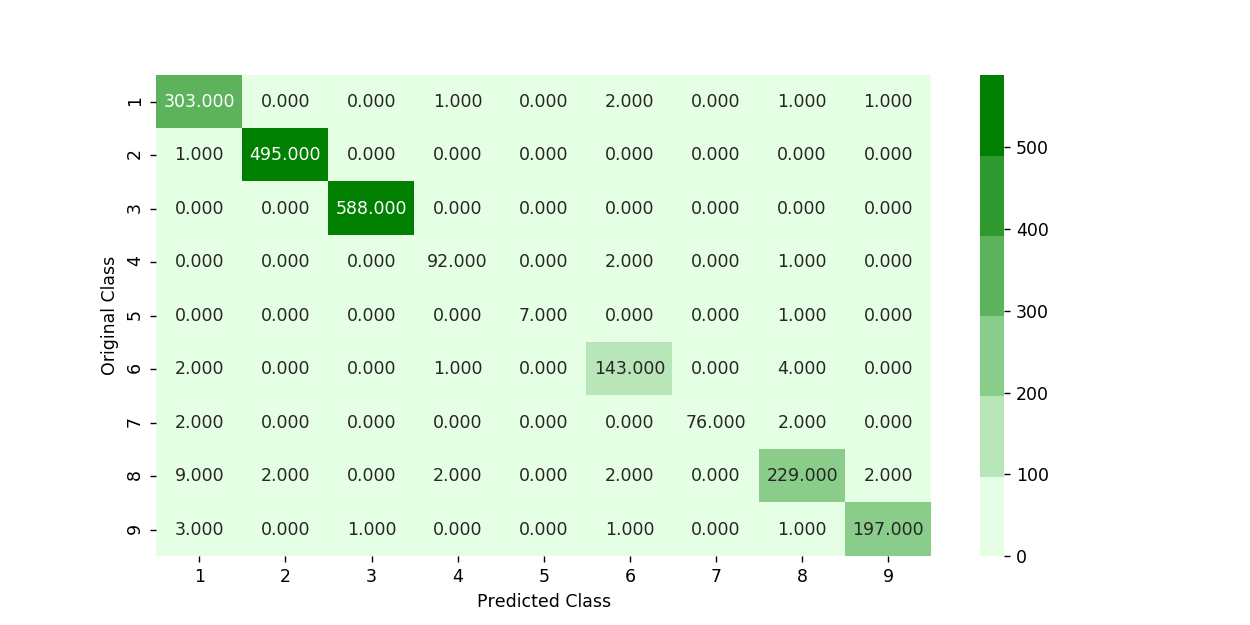

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


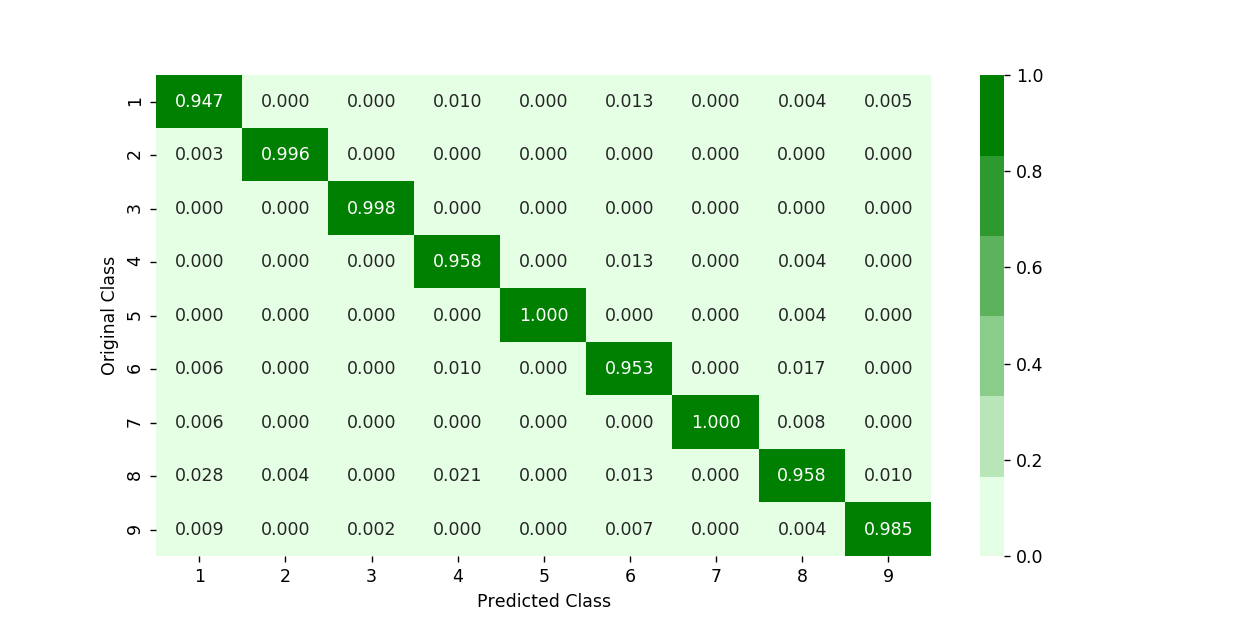

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


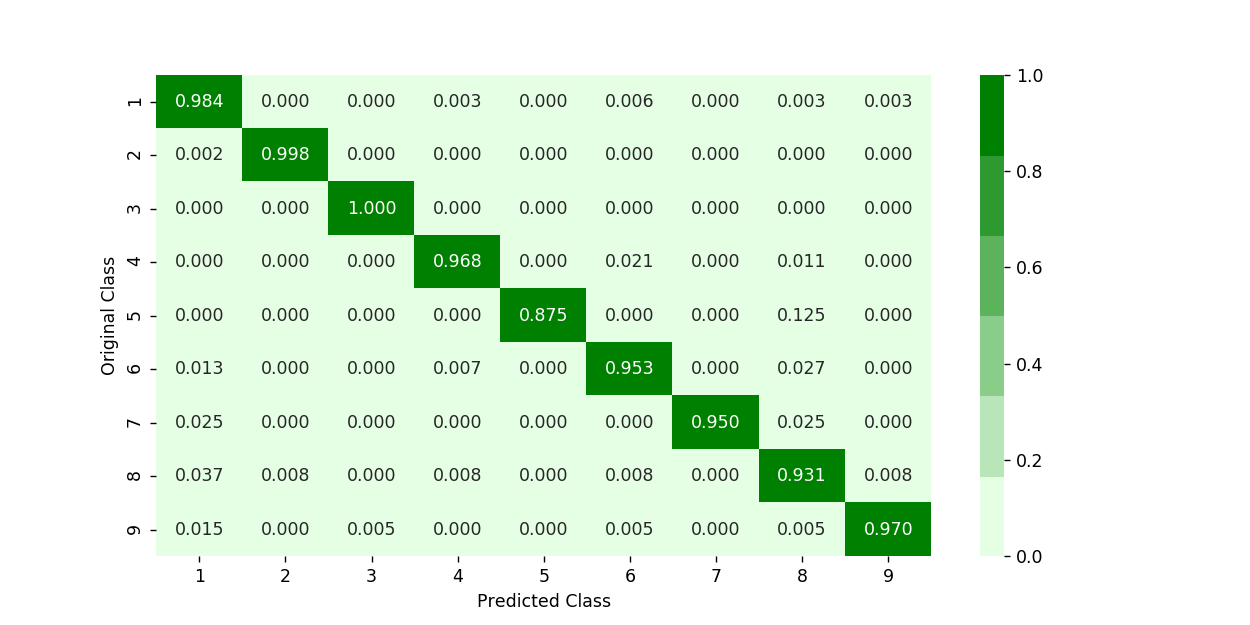

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [72]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification</h3>

log_loss for c =  10 is 0.18920760956006458
log_loss for c =  50 is 0.11056512147482774
log_loss for c =  100 is 0.08435535124657975
log_loss for c =  500 is 0.06768680916271608
log_loss for c =  1000 is 0.0680561667937048
log_loss for c =  2000 is 0.06824311154293254


<IPython.core.display.Javascript object>


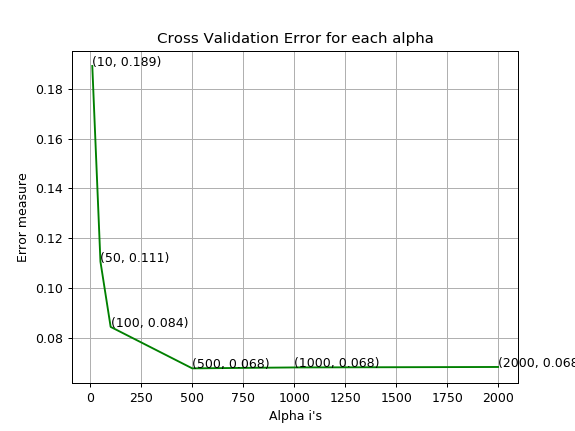

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=-1, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
            cv=3, method='sigmoid')

In [14]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance

alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    


<h3>4.1.5. XgBoost Classification with best hyper parameters using RandomSearch </h3>

In [15]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 19.7min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 20.5min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [16]:
print (random_cfl1.best_params_)

{'subsample': 1, 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.1}


In [17]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance


x_cfl=XGBClassifier(n_estimators=2000, learning_rate=0.05, colsample_bytree=1, max_depth=3)
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

train loss 0.023171858903458402
cv loss 0.06906521279666586
test loss 0.07112357600442189


In [20]:
import pickle
outfile1 = open("XGBoostModel","wb")
pickle.dump(c_cfl,outfile1)
outfile1.close()
outfile2 = open("TestData","wb")
pickle.dump(X_test,outfile2)
outfile2.close()
outfile3 = open("TestLabel","wb")
pickle.dump(y_test,outfile3)
outfile3.close()

<h2> 4.2 Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> 4.2.1 Feature extraction from asm files </h3>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
</p>

In [12]:
#intially create five folders
#first 
#second
#thrid
#fourth
#fifth
#this code tells us about random split of files into five folders
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 = 'output'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='train/'
files = os.listdir('train')
df = pd.read_csv("trainLabels.csv")
ID=df['Id'].tolist()
data=range(0,10868)
r.shuffle(list(data))
count=0
for i in range(0,10868):
    if i % 5==0:
        shutil.move(source+files[data[i]],'first')
    elif i%5==1:
        shutil.move(source+files[data[i]],'second')
    elif i%5 ==2:
        shutil.move(source+files[data[i]],'third')
    elif i%5 ==3:
        shutil.move(source+files[data[i]],'fourth')
    elif i%5==4:
        shutil.move(source+files[data[i]],'fifth')

In [14]:

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html
from tqdm import tqdm
def firstprocess():
    #print("inside first")
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #this prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    #this are opcodes that are used to get best results
    #https://en.wikipedia.org/wiki/X86_instruction_listings
    
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    #best keywords that are taken from different blogs
    keywords = ['.dll','std::',':dword']
    #Below taken registers are general purpose registers and special registers
    #All the registers which are taken are best 
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open(r"C:\Users\rites\Desktop\Assignments\microsoft_project\output\asmsmallfile.txt","w+")
    opcodefile = open(r"C:\Users\rites\Desktop\Assignments\microsoft_project\output\opcodefile.txt","w+")
    files = os.listdir('first')
    for f in tqdm(files):
        #filling the values with zeros into the arrays
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open('first/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line=lines.rstrip().split()
                l=line[0]
                #counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                #counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                #counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                #counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        #pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


#same as above 
def secondprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open(r"C:\Users\rites\Desktop\Assignments\microsoft_project\output\mediumasmfile.txt","w+")
    opcodefile = open(r"C:\Users\rites\Desktop\Assignments\microsoft_project\output\opcodefile.txt","w+")
    files = os.listdir('second')
    for f in tqdm(files):
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('second/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()

# same as smallprocess() functions
def thirdprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open(r"C:\Users\rites\Desktop\Assignments\microsoft_project\output\largeasmfile.txt","w+")
    opcodefile = open(r"C:\Users\rites\Desktop\Assignments\microsoft_project\output\opcodefile.txt","w+")
    files = os.listdir('thrid')
    for f in tqdm(files):
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('thrid/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fourthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open(r"C:\Users\rites\Desktop\Assignments\microsoft_project\output\hugeasmfile.txt","w+")
    opcodefile = open(r"C:\Users\rites\Desktop\Assignments\microsoft_project\output\opcodefile.txt","w+")
    files = os.listdir('fourth/')
    for f in tqdm(files):
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fourth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fifthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open(r"C:\Users\rites\Desktop\Assignments\microsoft_project\output\trainasmfile.txt","w+")
    opcodefile = open(r"C:\Users\rites\Desktop\Assignments\microsoft_project\output\opcodefile.txt","w+")
    files = os.listdir('fifth/')
    for f in tqdm(files):
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fifth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()




In [24]:
from tqdm import tqdm
import functions
import os
def main():
    #print("inside main")
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager()
    p1=Process(target=functions.firstprocess)
    p2=Process(target=functions.secondprocess)
    p3=Process(target=functions.thirdprocess)
    p4=Process(target=functions.fourthprocess)
    p5=Process(target=functions.fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #print("after starting")
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

In [8]:
# Converting text file created by above code into csv
import csv

with open('trainasmfile.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('asmFiles.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerows(lines)

In [9]:
asm_data = pd.read_csv("asmFiles.csv")
asm_data.head(5)

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01SuzwMJEIXsK7A8dQbl       18   10368      0      206    4595     92   
1  02MRILoE6rNhmt7FUi45        0    5372      0      606    4329      0   
2  04EjIdbPV5e1XroFOpiN       19   60476      0      349    3760      0   
3  05aiMRw13bYWqZ8OHvjl        0  102549      0      310   26642      0   
4  05rJTUWYAKNegBk2wE8X       19  208048      0     1746   19267      0   

   .rdata:  .edata:  .rsrc:  ...    esi    eax    ebx   ecx  edi  ebp  esp  \
0        0        0       3  ...   1228     24   1546   107    0   15    0   
1  2349368        0       0  ...    665    291    664   256    0   19   16   
2        0        0       3  ...   5013   3960   6382   717    0   27    0   
3    52555        0       0  ...    962    459    904   629    0    7   22   
4        0        0       3  ...  15495  16570  28503  2825    0   87    0   

   eip  unnamed  Unnamed: 53  
0   76      NaN          NaN  
1  203      NaN          NaN  
2   88      NaN          NaN  
3   78      NaN          NaN  
4  491      NaN          NaN  

[5 rows x 54 columns]

In [10]:
# Removing columns that have all NaN values
asm_data.drop(['Unnamed: 53'],axis=1,inplace=True)
asm_data.head(5)

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01SuzwMJEIXsK7A8dQbl       18   10368      0      206    4595     92   
1  02MRILoE6rNhmt7FUi45        0    5372      0      606    4329      0   
2  04EjIdbPV5e1XroFOpiN       19   60476      0      349    3760      0   
3  05aiMRw13bYWqZ8OHvjl        0  102549      0      310   26642      0   
4  05rJTUWYAKNegBk2wE8X       19  208048      0     1746   19267      0   

   .rdata:  .edata:  .rsrc:  ...    edx    esi    eax    ebx   ecx  edi  ebp  \
0        0        0       3  ...     18   1228     24   1546   107    0   15   
1  2349368        0       0  ...    263    665    291    664   256    0   19   
2        0        0       3  ...   2496   5013   3960   6382   717    0   27   
3    52555        0       0  ...    348    962    459    904   629    0    7   
4        0        0       3  ...  11358  15495  16570  28503  2825    0   87   

   esp  eip  unnamed  
0    0   76      NaN  
1   16  203      NaN  
2    0   88      NaN  
3   22   78      NaN  
4    0  491      NaN  

[5 rows x 53 columns]

In [11]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
Y = pd.read_csv("trainLabels.csv")
dfasm=pd.read_csv("asmFiles.csv")
# Removing columns that have all NaN values
dfasm.drop(['unnamed','Unnamed: 53'],axis=1,inplace=True)
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01SuzwMJEIXsK7A8dQbl       18   10368      0      206    4595     92   
1  02MRILoE6rNhmt7FUi45        0    5372      0      606    4329      0   
2  04EjIdbPV5e1XroFOpiN       19   60476      0      349    3760      0   
3  05aiMRw13bYWqZ8OHvjl        0  102549      0      310   26642      0   
4  05rJTUWYAKNegBk2wE8X       19  208048      0     1746   19267      0   

   .rdata:  .edata:  .rsrc:  ...    edx    esi    eax    ebx   ecx  edi  ebp  \
0        0        0       3  ...     18   1228     24   1546   107    0   15   
1  2349368        0       0  ...    263    665    291    664   256    0   19   
2        0        0       3  ...   2496   5013   3960   6382   717    0   27   
3    52555        0       0  ...    348    962    459    904   629    0    7   
4        0        0       3  ...  11358  15495  16570  28503  2825    0   87   

   esp  eip  Class  
0    0   76      8  
1   16  203      2  
2    0   88      1  
3   22   78      2  
4    0  491      1  

[5 rows x 53 columns]

<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [12]:
#file sizes of asm files
from tqdm import tqdm
files=os.listdir('asmFiles1')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in tqdm(files):
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles1/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

100%|███████████████████████████████████████████████████████████████████████████| 10868/10868 [00:13<00:00, 776.67it/s]


                     ID       size  Class
0  01azqd4InC7m9JpocGv5  56.229886      9
1  01IsoiSMh5gxyDYTl4CB  13.999378      2
2  01jsnpXSAlgw6aPeDxrU   8.507785      9
3  01kcPWA9K2BOxQeS5Rju   0.078190      1
4  01SuzwMJEIXsK7A8dQbl   0.996723      8


<h4> 4.2.1.2 Distribution of .asm file sizes</h4>

<IPython.core.display.Javascript object>


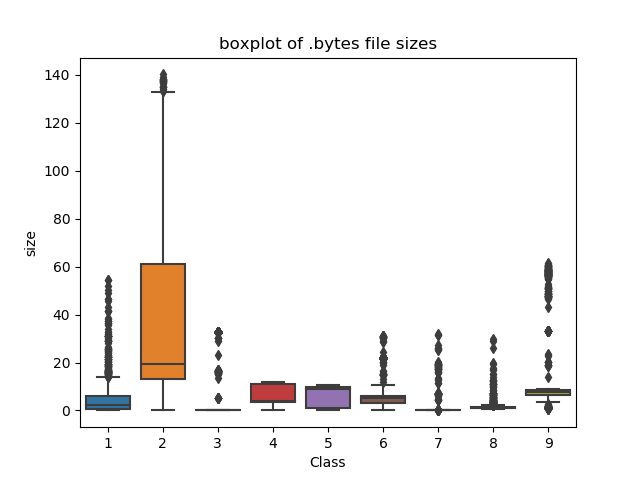

In [7]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [13]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
result_asm.head()

(10868, 53)
(10868, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01SuzwMJEIXsK7A8dQbl       18   10368      0      206    4595     92   
1  02MRILoE6rNhmt7FUi45        0    5372      0      606    4329      0   
2  04EjIdbPV5e1XroFOpiN       19   60476      0      349    3760      0   
3  05aiMRw13bYWqZ8OHvjl        0  102549      0      310   26642      0   
4  05rJTUWYAKNegBk2wE8X       19  208048      0     1746   19267      0   

   .rdata:  .edata:  .rsrc:  ...    esi    eax    ebx   ecx  edi  ebp  esp  \
0        0        0       3  ...   1228     24   1546   107    0   15    0   
1  2349368        0       0  ...    665    291    664   256    0   19   16   
2        0        0       3  ...   5013   3960   6382   717    0   27    0   
3    52555        0       0  ...    962    459    904   629    0    7   22   
4        0        0       3  ...  15495  16570  28503  2825    0   87    0   

   eip  Class       size  
0   76      8   0.996723  
1  203      2  83.639698  
2   88      1   4.243397  
3   78      2  15.068774  
4  491      1  12.703107  

[5 rows x 54 columns]

In [14]:
# we normalize the data each column 
result_asm = normalize(result_asm)

In [15]:
result_asm.head(5)

ID   HEADER:    .text:  .Pav:   .idata:    .data:  \
0  01SuzwMJEIXsK7A8dQbl  0.101695  0.015220    0.0  0.001234  0.001825   
1  02MRILoE6rNhmt7FUi45  0.000000  0.007886    0.0  0.003630  0.001719   
2  04EjIdbPV5e1XroFOpiN  0.107345  0.088779    0.0  0.002091  0.001493   
3  05aiMRw13bYWqZ8OHvjl  0.000000  0.150543    0.0  0.001857  0.010582   
4  05rJTUWYAKNegBk2wE8X  0.107345  0.305416    0.0  0.010459  0.007652   

      .bss:   .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx  \
0  0.012842  0.000000      0.0  0.000072  ...  0.013875  0.000482  0.012932   
1  0.000000  0.611859      0.0  0.000000  ...  0.007514  0.005848  0.005554   
2  0.000000  0.000000      0.0  0.000072  ...  0.056642  0.079584  0.053384   
3  0.000000  0.013687      0.0  0.000000  ...  0.010870  0.009224  0.007562   
4  0.000000  0.000000      0.0  0.000072  ...  0.175079  0.333005  0.238421   

        ecx  edi       ebp       esp       eip  Class      size  
0  0.001363  0.0  0.027174  0.000000  0.008316      8  0.006983  
1  0.003261  0.0  0.034420  0.000489  0.022212      2  0.596398  
2  0.009134  0.0  0.048913  0.000000  0.009629      1  0.030139  
3  0.008013  0.0  0.012681  0.000673  0.008535      2  0.107346  
4  0.035988  0.0  0.157609  0.000000  0.053726      1  0.090474  

[5 rows x 54 columns]

<h3> 4.2.2 Univariate analysis on  asm file features</h3>

<IPython.core.display.Javascript object>


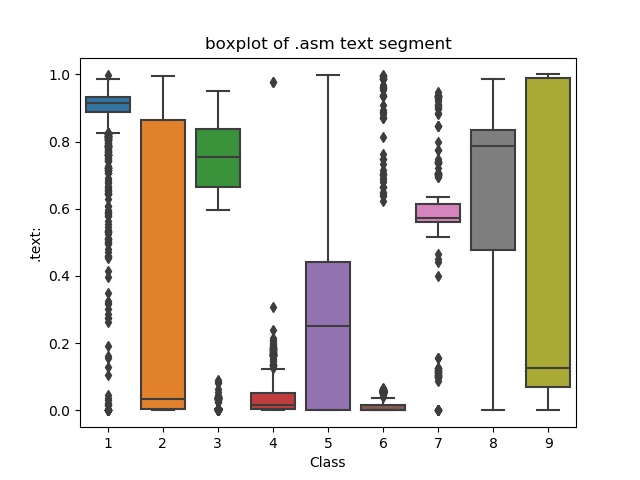

In [14]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

<IPython.core.display.Javascript object>


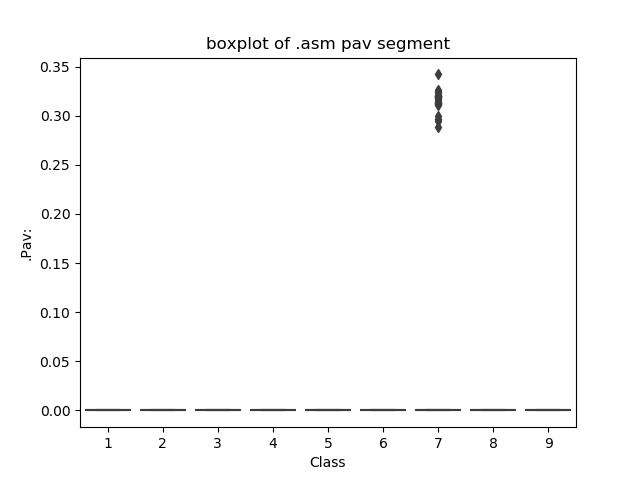

In [15]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

<IPython.core.display.Javascript object>


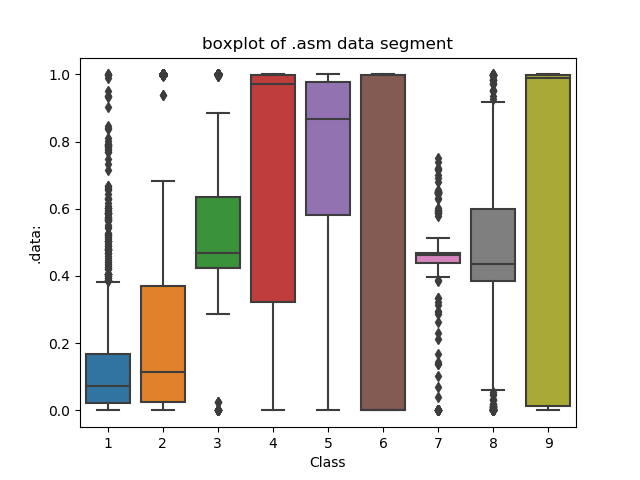

In [16]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

<IPython.core.display.Javascript object>


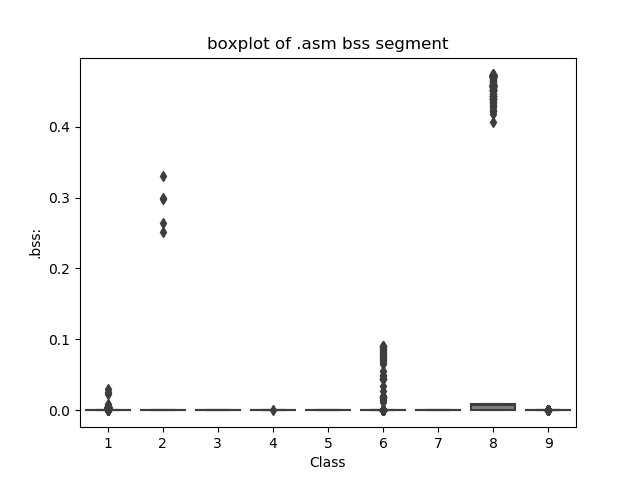

In [17]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

<IPython.core.display.Javascript object>


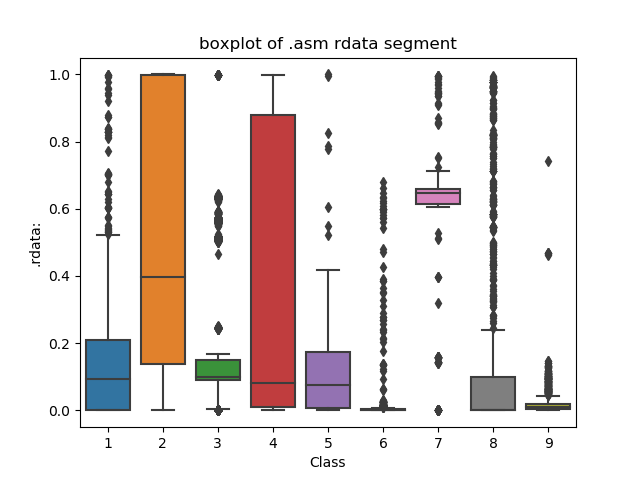

In [18]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

<IPython.core.display.Javascript object>


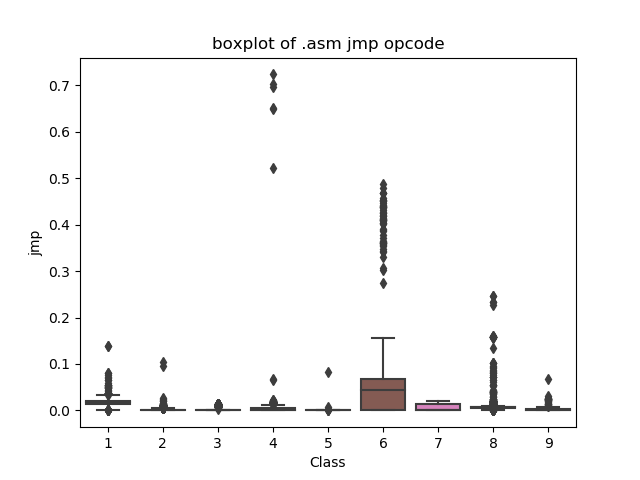

In [19]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


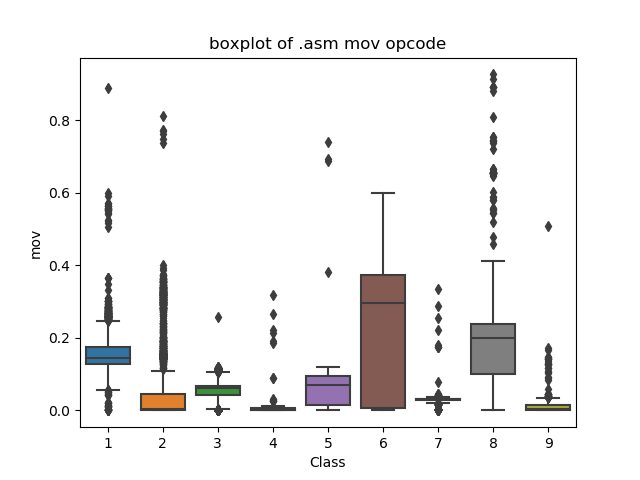

In [20]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


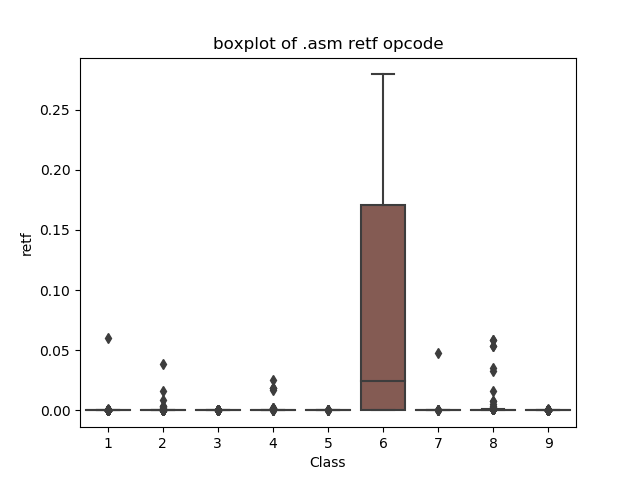

In [21]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

<IPython.core.display.Javascript object>


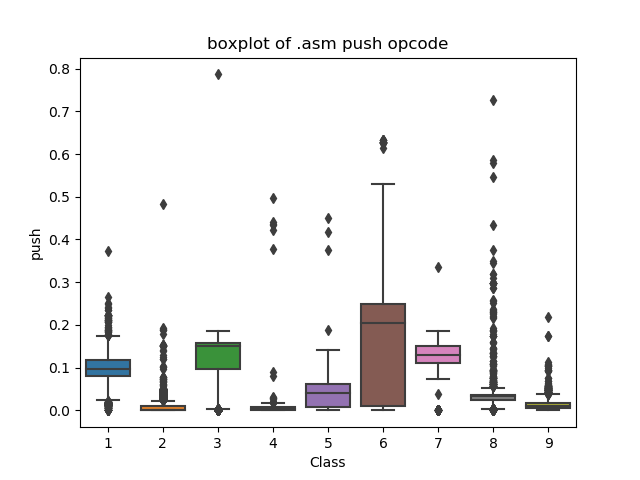

In [22]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h3> 4.2.2 Multivariate Analysis on .asm file features </h3>

<IPython.core.display.Javascript object>


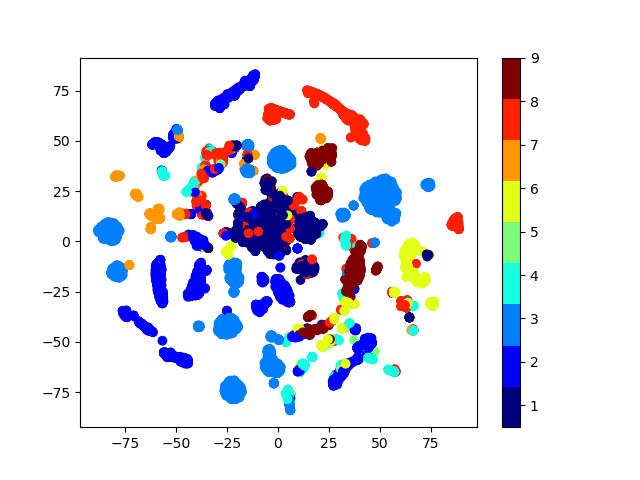

In [23]:

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1]
data_y = result_asm['Class']
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


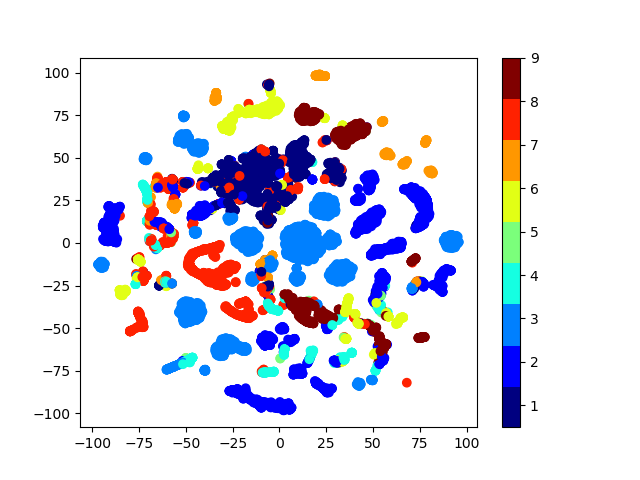

In [24]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE:','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 30
</pre>

<h3> 4.2.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h2> 4.3 Train and test split</h2>

In [13]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE:'], axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [15]:
print( X_cv_asm.isnull().all())

HEADER:    False
.text:     False
.Pav:      False
.idata:    False
.data:     False
.bss:      False
.rdata:    False
.edata:    False
.rsrc:     False
.tls:      False
.reloc:    False
jmp        False
mov        False
retf       False
push       False
pop        False
xor        False
retn       False
nop        False
sub        False
inc        False
dec        False
add        False
imul       False
xchg       False
or         False
shr        False
cmp        False
call       False
shl        False
ror        False
rol        False
jnb        False
jz         False
lea        False
movzx      False
.dll       False
std::      False
:dword     False
edx        False
esi        False
eax        False
ebx        False
ecx        False
edi        False
ebp        False
esp        False
eip        False
size       False
dtype: bool


<h2> 4.4. Machine Learning models on features of .asm files</h2>

<h3> 4.4.1 K-Nearest Neigbors </h3>

log_loss for k =  1 is 0.15786066821447003
log_loss for k =  3 is 0.16112460563821174
log_loss for k =  5 is 0.18609430246897776
log_loss for k =  7 is 0.20828642912839335
log_loss for k =  9 is 0.2221744112308525
log_loss for k =  11 is 0.2351283443146615
log_loss for k =  13 is 0.24901009399712767
log_loss for k =  15 is 0.25783395557194505
log_loss for k =  17 is 0.26803665784928776
log_loss for k =  19 is 0.2770362210294501


<IPython.core.display.Javascript object>


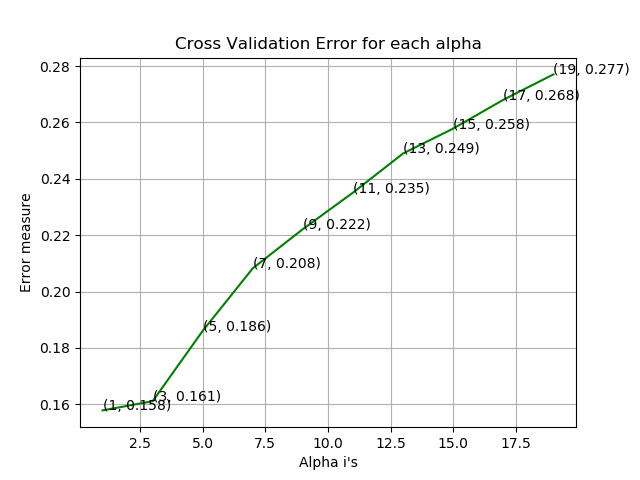

log loss for train data 0.06273406969766557
log loss for cv data 0.15786066821447003
log loss for test data 0.155124403246879
Number of misclassified points  2.667893284268629
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


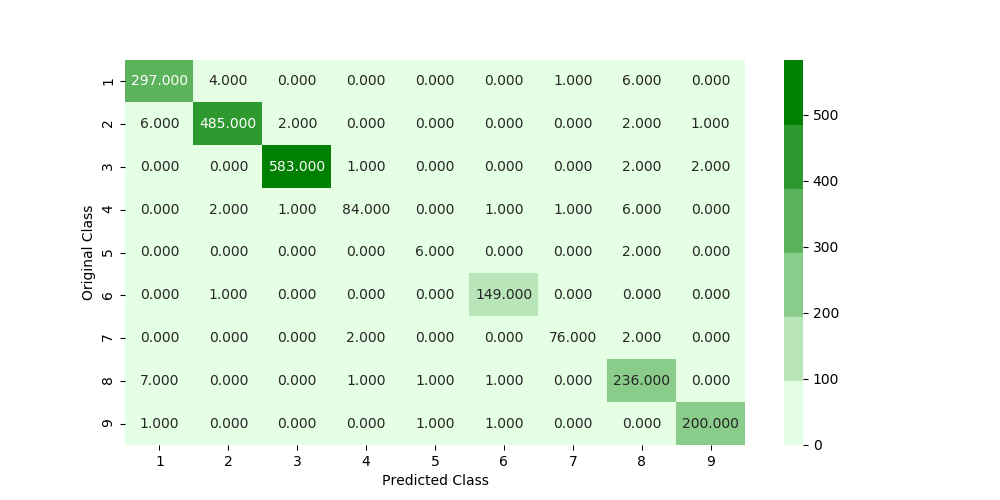

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


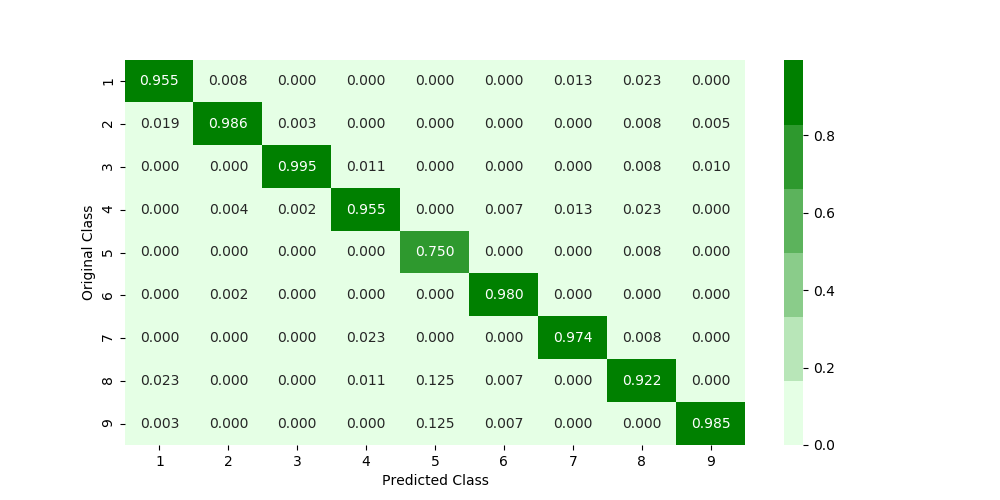

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


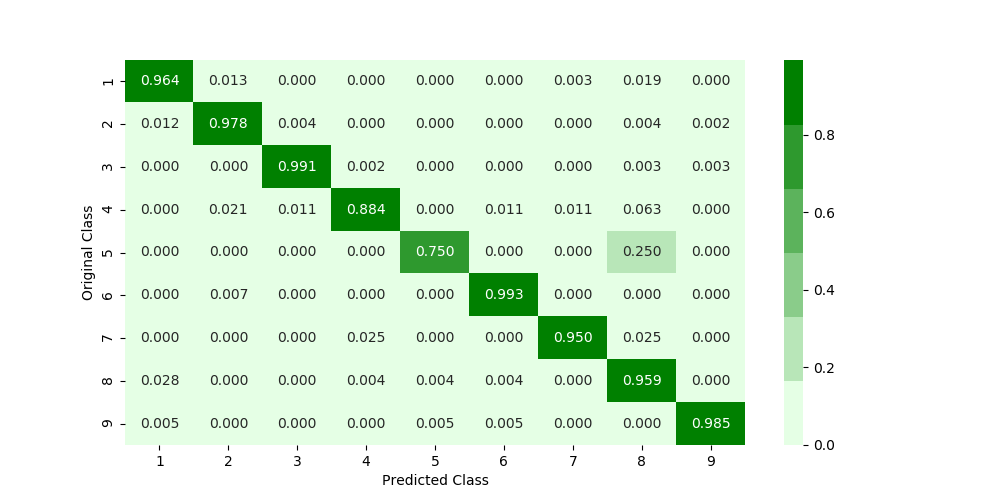

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [30]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
-----------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.2 Logistic Regression </h3>

log_loss for c =  1e-05 is 1.6581248145280183
log_loss for c =  0.0001 is 1.6508884545307796
log_loss for c =  0.001 is 1.581718300099581
log_loss for c =  0.01 is 1.3442538948839087
log_loss for c =  0.1 is 1.0253971603444534
log_loss for c =  1 is 0.7780490900026676
log_loss for c =  10 is 0.6260793857157849
log_loss for c =  100 is 0.5424808236489959
log_loss for c =  1000 is 0.484185174474202


<IPython.core.display.Javascript object>


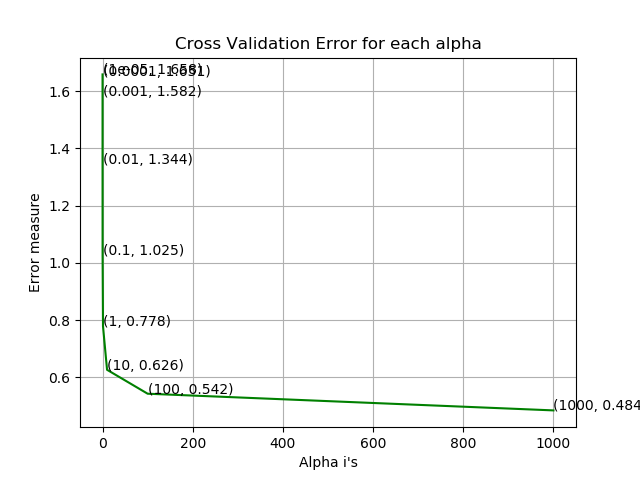

log loss for train data 0.40874014808650244
log loss for cv data 0.484185174474202
log loss for test data 0.4229023222991215
Number of misclassified points  10.349586016559337
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


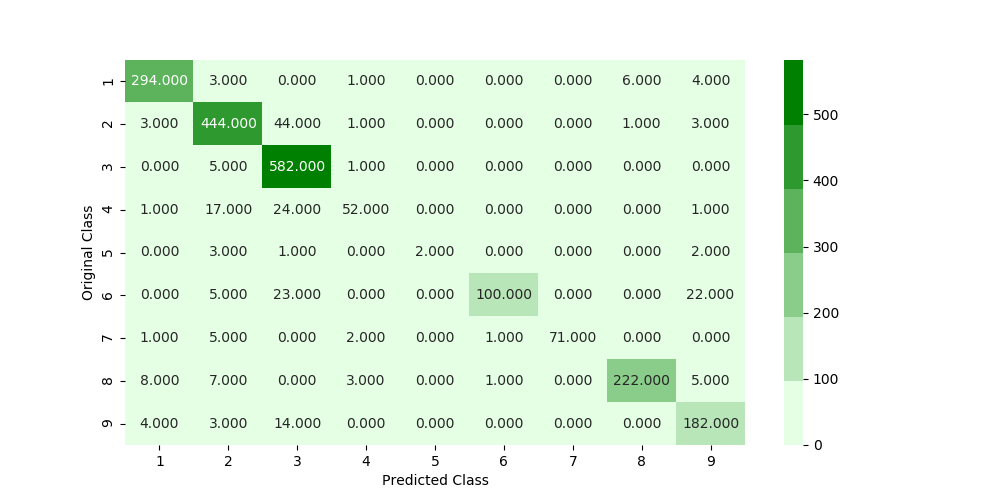

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


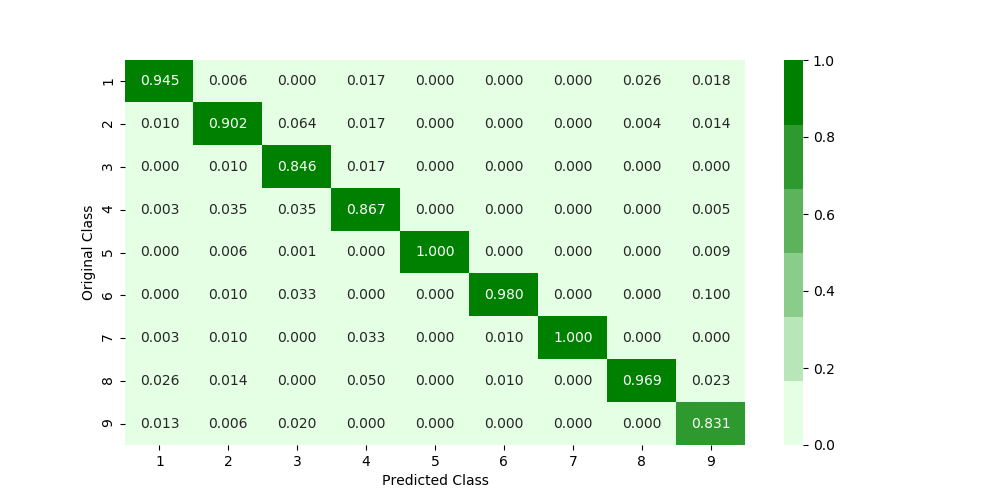

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


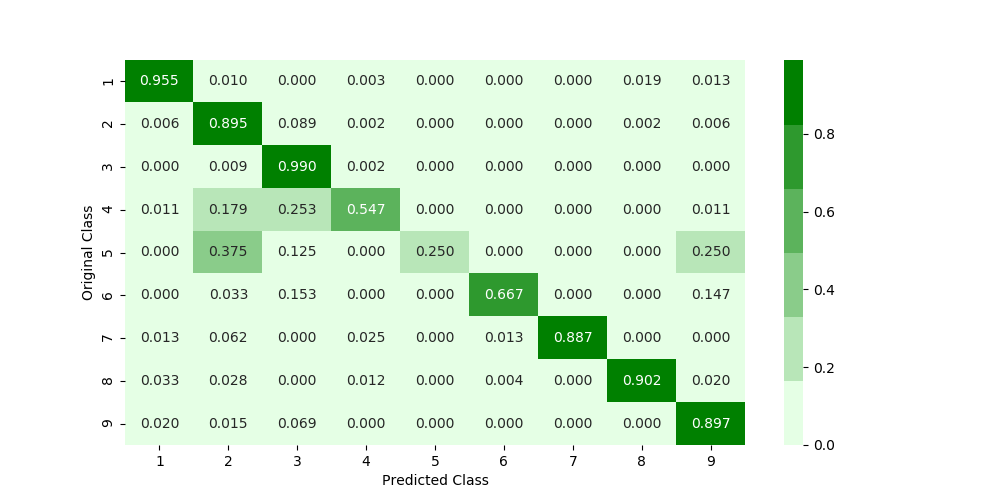

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [64]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#---------------------------
from sklearn.linear_model import LogisticRegression

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.3 Random Forest Classifier</h3>

log_loss for c =  10 is 0.07331587750284241
log_loss for c =  50 is 0.06974612391743763
log_loss for c =  100 is 0.07038042348551536
log_loss for c =  500 is 0.06977474704069968
log_loss for c =  1000 is 0.06966375272520296
log_loss for c =  2000 is 0.06933503143398959
log_loss for c =  3000 is 0.06906599002199582


<IPython.core.display.Javascript object>


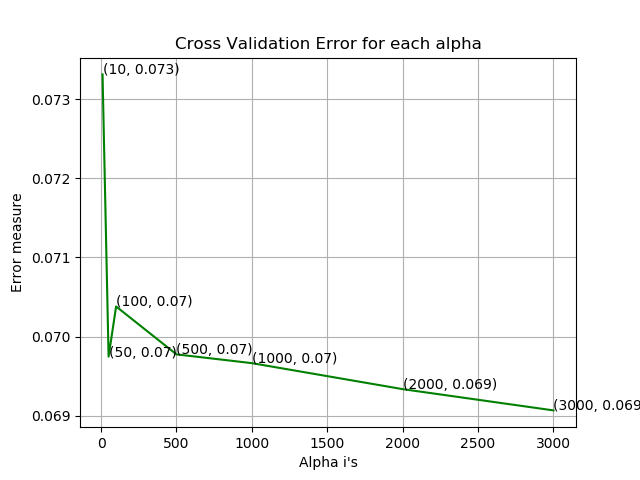

log loss for train data 0.025579078951777426
log loss for cv data 0.06906599002199582
log loss for test data 0.05402912780756279
Number of misclassified points  1.1039558417663293
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


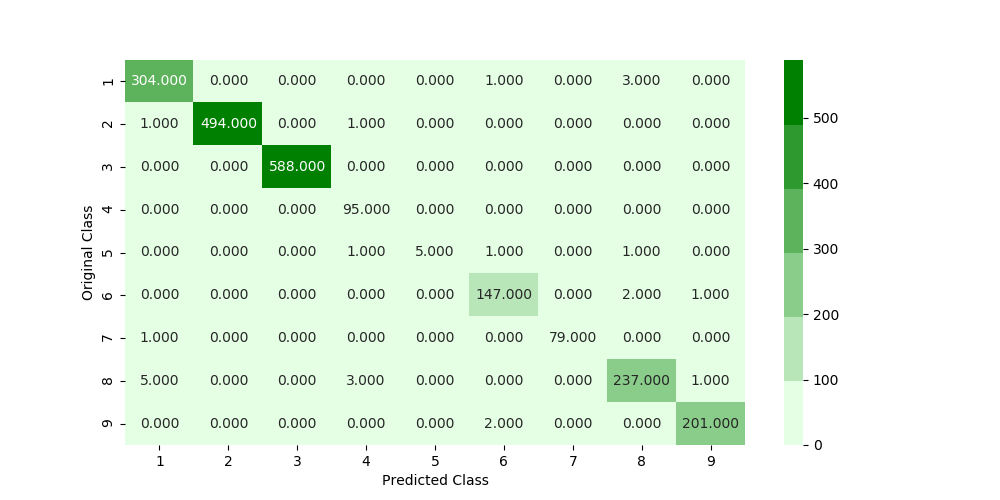

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


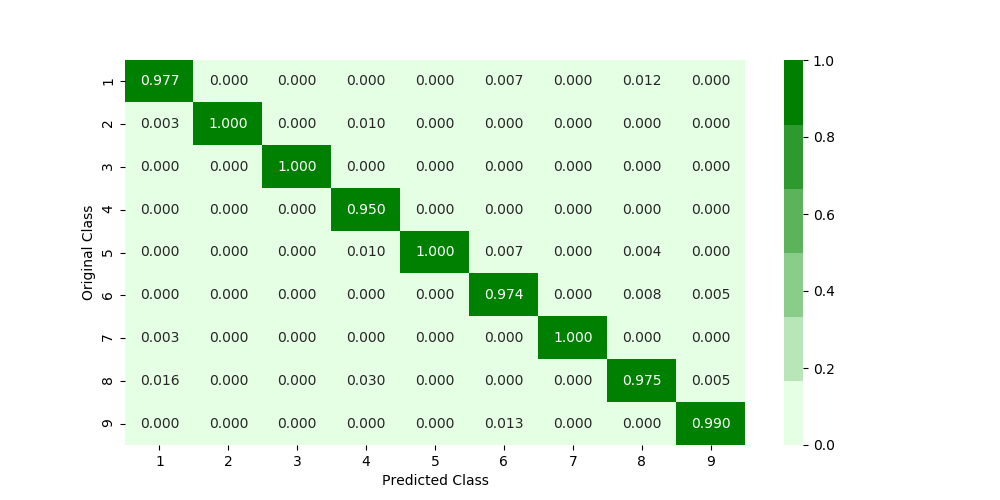

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


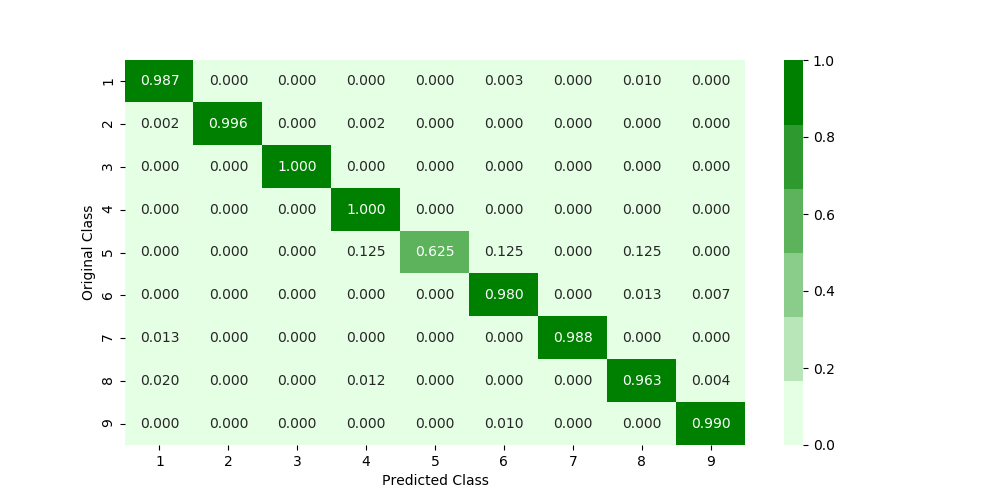

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [65]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).


from sklearn.ensemble import RandomForestClassifier

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.4 XgBoost Classifier</h3>

log_loss for c =  10 is 0.14056134290697664
log_loss for c =  50 is 0.08131348833940705
log_loss for c =  100 is 0.06754470773679559
log_loss for c =  500 is 0.06428802163047172
log_loss for c =  1000 is 0.06414205150353479
log_loss for c =  2000 is 0.06403167233059873
log_loss for c =  3000 is 0.06426419647099281


<IPython.core.display.Javascript object>


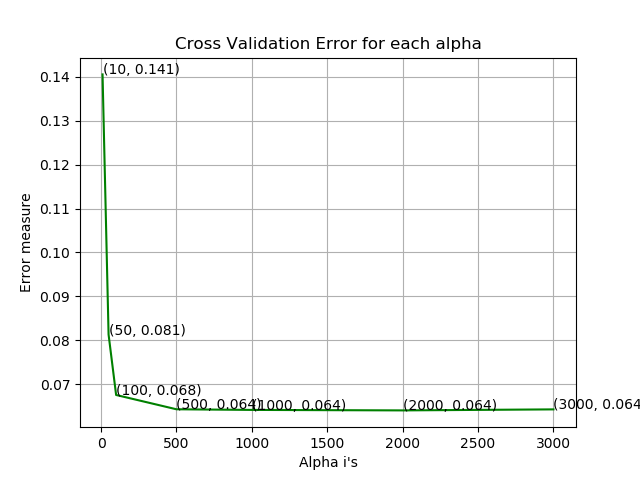

For values of best alpha =  2000 The train log loss is: 0.02677369583309767
For values of best alpha =  2000 The cross validation log loss is: 0.06403167233059873
For values of best alpha =  2000 The test log loss is: 0.05301222730452625
Number of misclassified points  0.9199632014719411
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


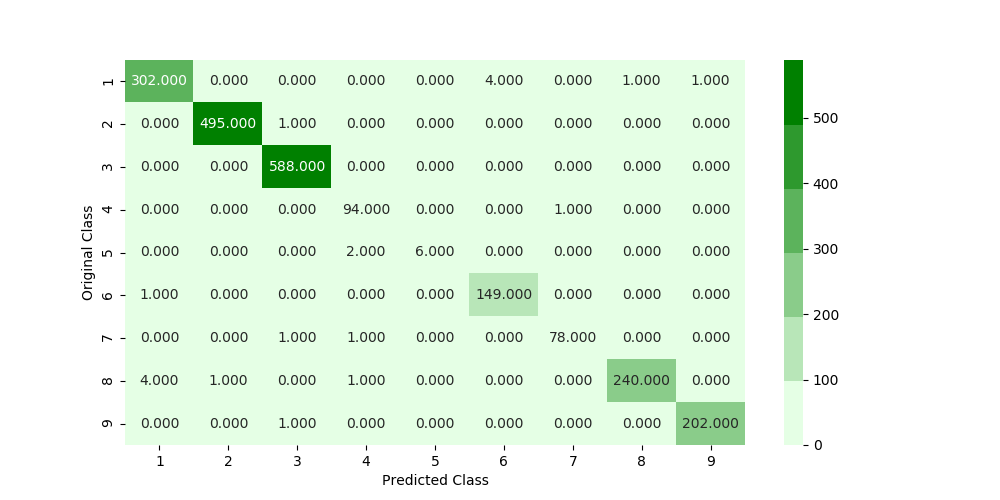

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


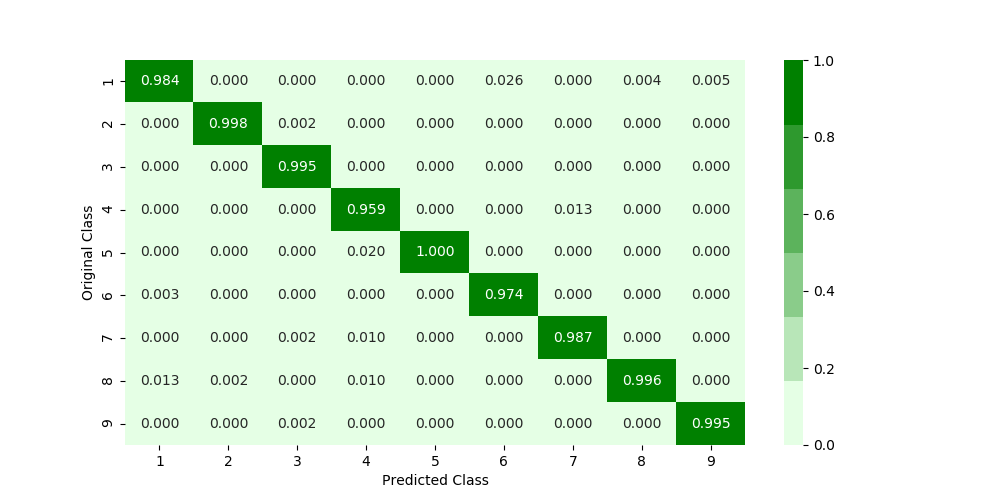

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


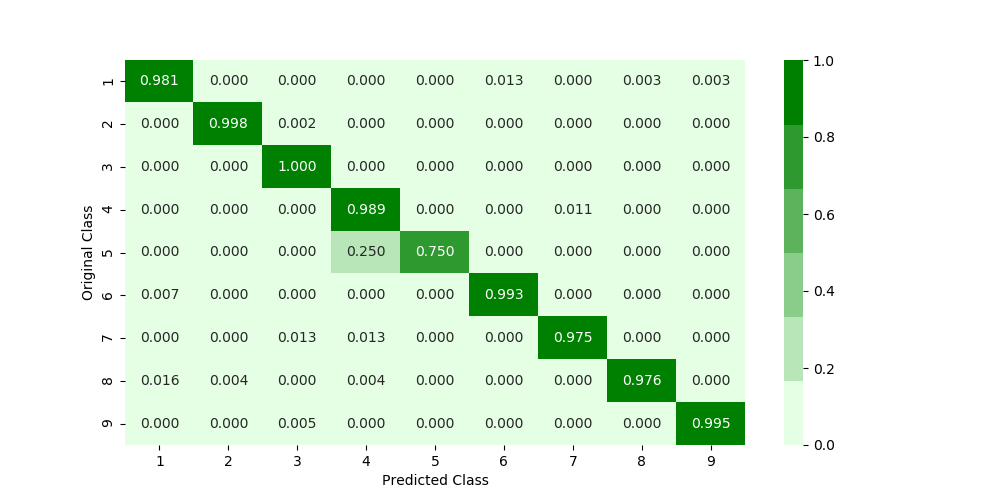

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [21]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
#--------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.5 Xgboost Classifier with best hyperparameters</h3>

In [22]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  6.0min remaining:   39.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.0min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [23]:
print (random_cfl.best_params_)

{'subsample': 0.5, 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


In [24]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance


x_cfl=XGBClassifier(n_estimators=2000,subsample=0.5,learning_rate=0.1,colsample_bytree=0.5,max_depth=10)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 0.026107092751235315
cv loss 0.06330298157903923
test loss 0.05069660153063305


<h2> 4.5. Machine Learning models on features of both .asm and .bytes files</h2>

<h3> 4.5.1. Merging both asm and byte file features</h3>

In [16]:
result1.head()

ID  10 ??  22 ??  ?? 70  ?? 92  ?? 68  ?? 88  ?? 72  \
0  01IsoiSMh5gxyDYTl4CB    NaN    0.0    0.0    0.0    0.0    0.0    0.0   
1  01jsnpXSAlgw6aPeDxrU    NaN    0.0    0.0    0.0    0.0    0.0    0.0   
2  01kcPWA9K2BOxQeS5Rju    NaN    0.0    0.0    0.0    0.0    0.0    0.0   
3  01SuzwMJEIXsK7A8dQbl    NaN    0.0    0.0    0.0    0.0    0.0    0.0   
4  02IOCvYEy8mjiuAQHax3    NaN    0.0    0.0    0.0    0.0    0.0    0.0   

   ?? 64  ?? 58  ...        f9        fa        fb        fc        fd  \
0    0.0    0.0  ...  0.001920  0.001147  0.001329  0.087867  0.002432   
1    0.0    0.0  ...  0.009804  0.011777  0.012604  0.028423  0.013080   
2    0.0    0.0  ...  0.002121  0.001886  0.002272  0.013032  0.002211   
3    0.0    0.0  ...  0.001530  0.000853  0.001052  0.007511  0.001038   
4    0.0    0.0  ...  0.001290  0.001359  0.001514  0.003738  0.001559   

         fe        ff        ??      size  Class  
0  0.088411  0.074851  0.000606  0.121236      2  
1  0.013937  0.067001  0.000033  0.084499      9  
2  0.003957  0.010904  0.000984  0.010759      1  
3  0.001258  0.002998  0.000636  0.006233      8  
4  0.001669  0.000549  0.004305  0.012888      6  

[5 rows x 4261 columns]

In [21]:
result_asm = pd.read_csv("asmFiles.csv")
result_asm.drop(['unnamed','Unnamed: 53'],inplace=True,axis=1)
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01SuzwMJEIXsK7A8dQbl       18   10368      0      206    4595     92   
1  02MRILoE6rNhmt7FUi45        0    5372      0      606    4329      0   
2  04EjIdbPV5e1XroFOpiN       19   60476      0      349    3760      0   
3  05aiMRw13bYWqZ8OHvjl        0  102549      0      310   26642      0   
4  05rJTUWYAKNegBk2wE8X       19  208048      0     1746   19267      0   

   .rdata:  .edata:  .rsrc:  ...  :dword    edx    esi    eax    ebx   ecx  \
0        0        0       3  ...    1220     18   1228     24   1546   107   
1  2349368        0       0  ...     835    263    665    291    664   256   
2        0        0       3  ...    9782   2496   5013   3960   6382   717   
3    52555        0       0  ...    1314    348    962    459    904   629   
4        0        0       3  ...   40805  11358  15495  16570  28503  2825   

   edi  ebp  esp  eip  
0    0   15    0   76  
1    0   19   16  203  
2    0   27    0   88  
3    0    7   22   78  
4    0   87    0  491  

[5 rows x 52 columns]

In [22]:
print(result1.shape)
print(result_asm.shape)

(10868, 4261)
(10868, 52)


In [19]:
# Merging byte file features with asm unigram features
result_x = pd.merge(result_asm.drop(['Class'], axis=1),result1,on='ID', how='right')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE:','Class'], axis=1)
result_x.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9  ...       edx       esi       eax       ebx  \
0  0.002946  0.002638  0.003531  ...  0.015418  0.025875  0.025744  0.004910   
1  0.006984  0.008267  0.000394  ...  0.004961  0.012316  0.007858  0.007570   
2  0.002155  0.008104  0.002707  ...  0.000095  0.006181  0.000100  0.003773   
3  0.000481  0.000959  0.000521  ...  0.000343  0.000746  0.000301  0.000360   
4  0.000229  0.000376  0.000246  ...  0.000343  0.013875  0.000482  0.012932   

        ecx  edi       ebp       esp       eip    size_y  
0  0.008930  0.0  0.027174  0.000428  0.049896  0.400910  
1  0.005350  0.0  0.043478  0.000673  0.024839  0.099719  
2  0.000713  0.0  0.048913  0.000000  0.012802  0.060553  
3  0.001057  0.0  0.030797  0.001468  0.003173  0.000432  
4  0.001363  0.0  0.027174  0.000000  0.008316  0.006983  

[5 rows x 307 columns]

<h3> 4.5.2. Multivariate Analysis on final fearures</h3>

<IPython.core.display.Javascript object>


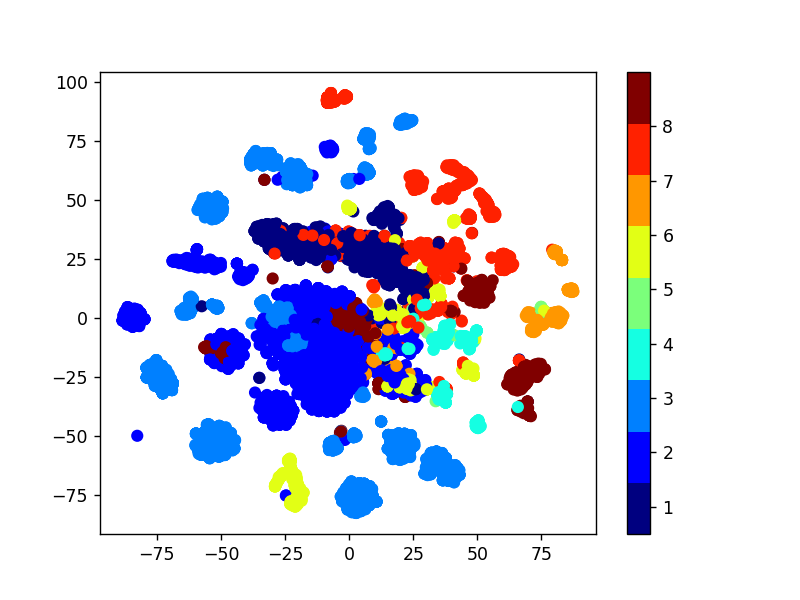

In [181]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_x, axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<h3> 4.5.3. Train and Test split</h3>

In [20]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.5.4. Random Forest Classifier on final features</h3>

log_loss for c =  10 is 0.0461221662017
log_loss for c =  50 is 0.0375229563452
log_loss for c =  100 is 0.0359765822455
log_loss for c =  500 is 0.0358291883873
log_loss for c =  1000 is 0.0358403093496
log_loss for c =  2000 is 0.0357908022178
log_loss for c =  3000 is 0.0355909487962


<IPython.core.display.Javascript object>


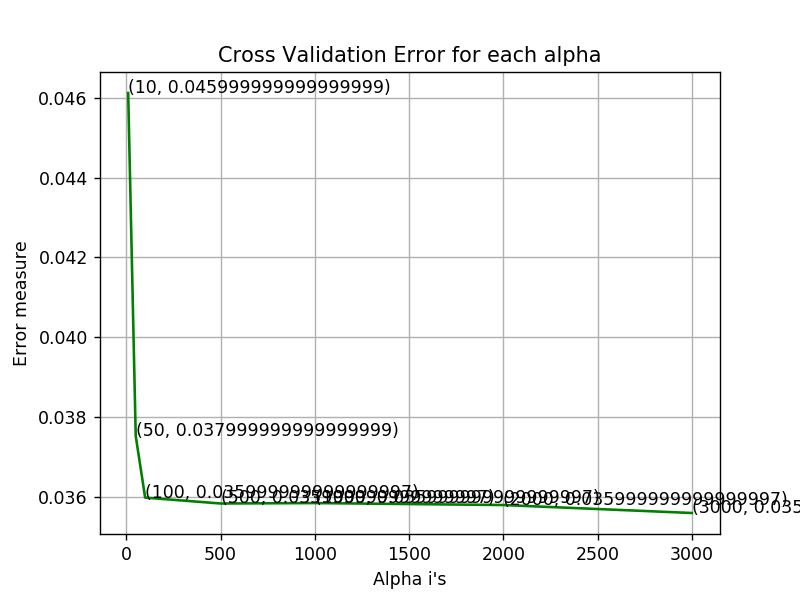

For values of best alpha =  3000 The train log loss is: 0.0166267614753
For values of best alpha =  3000 The cross validation log loss is: 0.0355909487962
For values of best alpha =  3000 The test log loss is: 0.0401141303589


In [185]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).


alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features</h3>

log_loss for c =  10 is 0.07741999849562692
log_loss for c =  50 is 0.03507693650949631
log_loss for c =  100 is 0.026542130772274547
log_loss for c =  500 is 0.02570273335476007
log_loss for c =  1000 is 0.025301281030375822


<IPython.core.display.Javascript object>


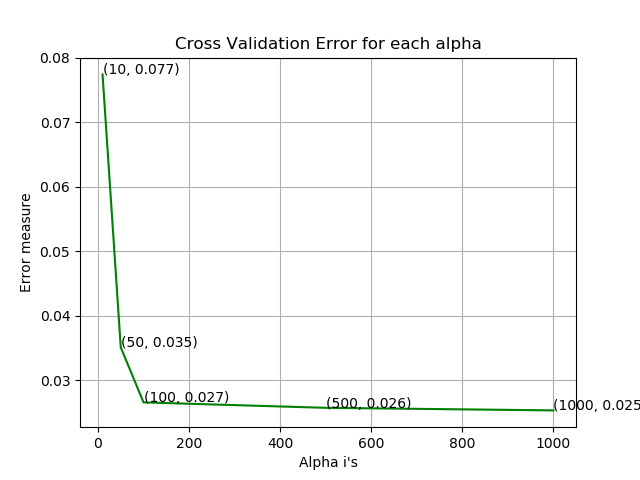

For values of best alpha =  1000 The train log loss is: 0.01400018964260945
For values of best alpha =  1000 The cross validation log loss is: 0.02567663559314766
For values of best alpha =  1000 The test log loss is: 0.02893740140897214


In [23]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance

alpha=[10,50,100,500,1000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,n_jobs=-1)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=3000,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [25]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.1,0.15,0.2],
     'n_estimators':[500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3],
    'subsample':[0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 20.8min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 21.8min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2], 'n_estimators': [500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3], 'subsample': [0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [26]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.1}


For values of best alpha =  1000 The train log loss is: 0.014069513875201747
For values of best alpha =  1000 The cross validation log loss is: 0.037076820577238906
For values of best alpha =  1000 The test log loss is: 0.03397733082955462
Number of misclassified points  0.6439742410303588
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


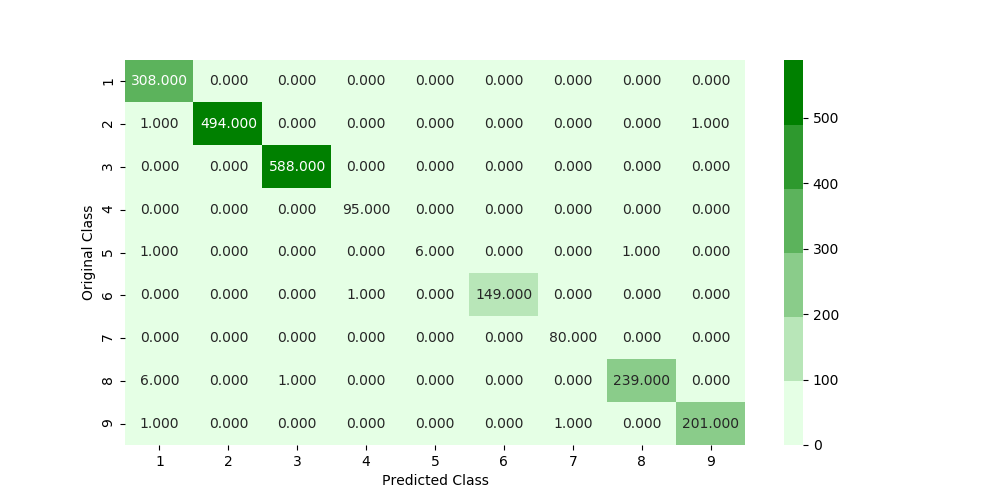

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


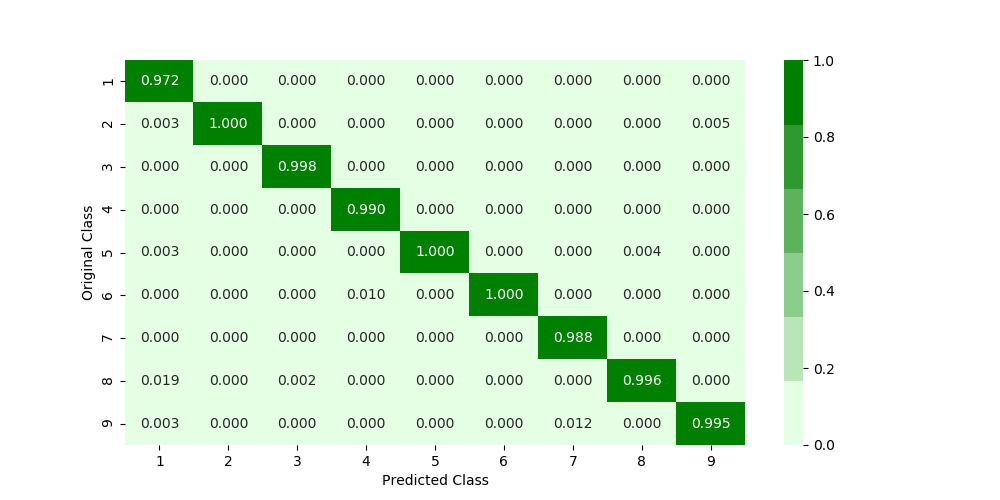

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


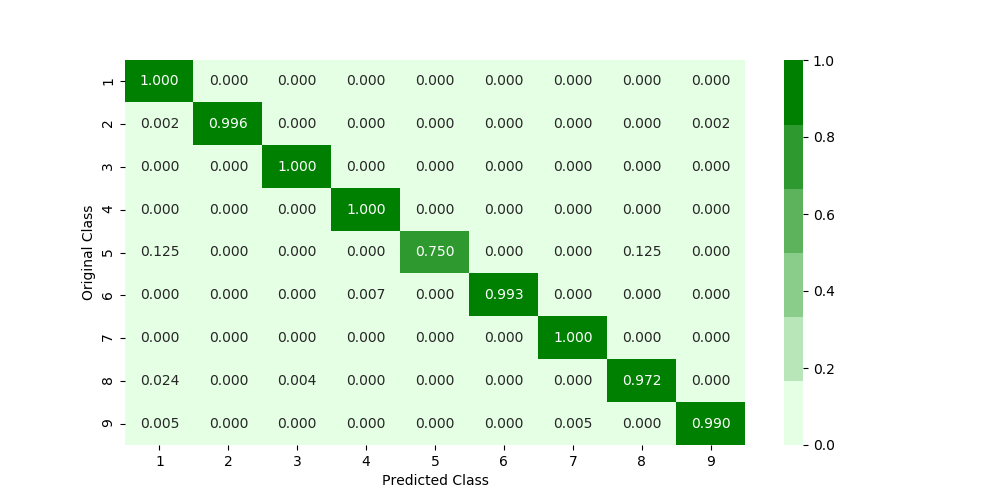

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [28]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance


x_cfl=XGBClassifier(n_estimators=500,max_depth=5,learning_rate=0.15,colsample_bytree=0.1,subsample=1,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

In [30]:
import pickle
outfile1 = open("FinalXGBoostModel","wb")
pickle.dump(sig_clf,outfile1)
outfile1.close()
outfile2 = open("FinalTestData","wb")
pickle.dump(X_test_merge,outfile2)
outfile2.close()
outfile3 = open("FinalTestLabel","wb")
pickle.dump(y_test_merge,outfile3)
outfile3.close()

<h3>Now we will extract bigram features from byte files.</h3>

In [1]:
feat = "0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"
feat1 = feat.split(",")
print(len(feat1))
# Now we will create bigram features from these unigram features
bigram_feat = {}
f_no = 0
for i in range(len(feat1)):
    for j in range(len(feat1)):
        if(i != j):
            f = str(feat1[i]) + " " + str(feat1[j])
            bigram_feat[f] = f_no
            f_no += 1

257


In [2]:
# We will make a dictionary to store overall frequency of all the features.
freq_dict = {}
for i in range(len(feat1)):
    for j in range(len(feat1)):
        if(i != j):
            f = str(feat1[i]) + " " + str(feat1[j])
            freq_dict[f] = 0  # Initially all the features will have 0  overall frequency.

In [3]:
# This string contains comma seperated names of all bigram features.
col_names = ''
for key,item in bigram_feat.items():
    col_names += str(key) +","
#print(len(col_names))
import re
col_names = col_names[0:len(col_names)-1]
col_names = "Id" + ","+ col_names
#print(col_names)

In [43]:
# First we will extract all bigram features and will count the number of documents in which a biagram occured.
from tqdm import tqdm
import nltk
files = os.listdir('byteFiles')
filenames2=[]
#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is unigram bag of words
k=0
byte_feature_file=open('result1.csv','w+')
byte_feature_file.write(col_names)
byte_feature_file.write(","+"\n")
for file in tqdm(files):
    bigram_feat_bow_lst = [0 for i in range(65792)]
    filenames2.append(file)
    byte_feature_file.write(file.split(".")[0]+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for i in range(len(line)-1):
                    col_index = bigram_feat.get(line[i] + " "+line[i+1],-1)
                    if(col_index >= 0):
                        bigram_feat_bow_lst[col_index] += 1 
            
            # We are keeping a record of the number of files in which a bigram is found
            for key,item in freq_dict.items():
                feat_index = bigram_feat.get(key)
                if(bigram_feat_bow_lst[feat_index]>0): # if this feature is present in this file .
                    freq_dict[key] += 1 # We will increment the value by one.
        byte_flie.close()
    #print(bigram_feat_bow_lst)
    for i in bigram_feat_bow_lst:
        byte_feature_file.write(str(i)+",")
        
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()


In [44]:
# Then we will use document frequencies to calcuate idf values for each bigram.
idf_dict = {}
import math
for key,item in freq_dict.items():
    if(item >5):
        idf_dict[key] = math.log10(10868/(item))

In [45]:
# Sorting on idf values in descending order and taking top 2000 bigrams.
top2000_bigram = []
for feat in sorted(idf_dict , key = idf_dict.get,reverse=True):
    top2000_bigram.append(feat)
    
top2000_bigram = top2000_bigram[0:2000]

In [46]:
# Top 2000 features
top2000_bigram = columns[1:2001]
col_names_top_2000 = ''
for i in top2000_bigram:
    col_names_top_2000 += i + ","
    
# Remove last extra comma
col_names_top_2000 = col_names_top_2000[0:len(col_names_top_2000)-1]
col_names_top_2000 = "ID" +"," + col_names_top_2000

In [47]:
# Now we will create a dictionary of all top 2000 features.
top_feat_dict = {}
k=0
for i in top2000_bigram:
    top_feat_dict[i] = k+1
    k += 1

In [48]:
# Now we will create a csv with 2000 bigram features that we selected.
from tqdm import tqdm
import nltk
files = os.listdir('byteFiles')
filenames2=[]
#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is unigram bag of words
k=0
byte_feature_file=open('result1.csv','w+')
byte_feature_file.write(col_names_top_2000)
byte_feature_file.write(","+"\n")
for file in files:
    bigram_feat_bow_lst = [0 for i in range(2001)]
    filenames2.append(file)
    byte_feature_file.write(file.split(".")[0]+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for i in range(len(line)-1):
                    col_index = top_feat_dict.get(line[i] + " "+line[i+1],-1)
                    if(col_index >= 0):
                        #print(col_index)
                        bigram_feat_bow_lst[col_index] += 1 
            
        byte_flie.close()
    #print(bigram_feat_bow_lst)
    for i in bigram_feat_bow_lst:
        byte_feature_file.write(str(i)+",")
        
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()




<h3>Extracting 1000 image pixel features from asm files</h3>

In [2]:
import os
import threading
import array
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
import gc

In [3]:
# https://github.com/dchad/malware-detection
def extract_asm_image_features(file_list, resultFileNumber):
 
    result_csv = "asm_image_features_" + resultFileNumber + ".csv"
    
    with open(result_csv,'w+') as result_csv:
        for i, file in enumerate(file_list):
            f = open(file,'rb')

            ln = os.path.getsize(file)

            width = 256

            rem = ln % width

            a = array.array("B")

            a.fromfile(f, ln-rem)

            f.close()

            g = list(a[0:1000])
            
            file_id = file.split('.')[0].split('\\')[1]
            
            line = [file_id] + g
            line = ",".join(map(str,line)) + "\n"
            result_csv.write(line)


In [4]:
def get_file_list():
    files = os.listdir('train')
    files = ["train" + "\\" + file for file in files]
    ret_file_list = []
    for i in range(0,10000,1000):
        ret_file_list.append(files[i : i+1000])
    
    ret_file_list.append(files[10000 : 10868])
    #file_list_batches = [ret_file_list.append(files[i:i+100]) for i in range(0,1000,100)]
    return ret_file_list

In [5]:
file_list = get_file_list()
total_files = 0
for fileNamesList in file_list:
    total_files = total_files + len(fileNamesList)
    
print(total_files)
len(file_list)

10868


11

In [6]:
feature_names = [f"pixel{i}" for i in range(1,1001)]

feature_names = ['ID'] + feature_names
feature_names = ",".join(map(str,feature_names)) + "\n"

In [7]:
out = "asm_image_features.csv"
with open(out,'w') as f:
    f.write(feature_names)

In [8]:
startTime = time.time()
t1 = threading.Thread(target=extract_asm_image_features, args=(file_list[0], "1"))
t2 = threading.Thread(target=extract_asm_image_features, args=(file_list[1], "2"))
t3 = threading.Thread(target=extract_asm_image_features, args=(file_list[2], "3"))
t4 = threading.Thread(target=extract_asm_image_features, args=(file_list[3], "4"))
t5 = threading.Thread(target=extract_asm_image_features, args=(file_list[4], "5"))
t6 = threading.Thread(target=extract_asm_image_features, args=(file_list[5], "6"))
t7 = threading.Thread(target=extract_asm_image_features, args=(file_list[6], "7"))
t8 = threading.Thread(target=extract_asm_image_features, args=(file_list[7], "8"))
t9 = threading.Thread(target=extract_asm_image_features, args=(file_list[8], "9"))
t10 = threading.Thread(target=extract_asm_image_features, args=(file_list[9], "10"))
t11 = threading.Thread(target=extract_asm_image_features, args=(file_list[10], "11"))

t1.start()
t2.start()
t3.start()
t4.start()
t5.start()
t6.start()
t7.start()
t8.start()
t9.start()
t10.start()
t11.start()

t1.join()
t2.join()
t3.join()
t4.join()
t5.join()
t6.join()
t7.join()
t8.join()
t9.join()
t10.join()
t11.join()

print('time taken convert files ',time.time()-startTime)

time taken convert files  2253.2054312229156


In [9]:
asm_feature_files = ['asm_image_features_1.csv', 'asm_image_features_2.csv', 'asm_image_features_3.csv', \
                     'asm_image_features_4.csv',\
                     'asm_image_features_5.csv', 'asm_image_features_6.csv', 'asm_image_features_7.csv', \
                     'asm_image_features_8.csv', 'asm_image_features_9.csv', 'asm_image_features_10.csv','asm_image_features_11.csv']

with open(out, 'a+') as f:
    for asm_image_feature_file in asm_feature_files:
        with open(asm_image_feature_file, 'r') as r:
            for l in r:
                f.write(l)

<h3>Training XGboost model on all the features extracted </h3>

In [2]:
Y=pd.read_csv("trainLabels.csv")

result=pd.read_csv("result.csv")
result.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...    f7    f8    f9    fa    fb    fc    fd     fe     ff     ??  
0  2965  ...  2804  3687  3101  3211  3097  2758  3099   2759   5753   1824  
1  9291  ...   451  6536   439   281   302  7639   518  17001  54902   8588  
2  9107  ...  2325  2358  2242  2885  2863  2471  2786   2680  49144    468  
3  1078  ...   478   873   485   462   516  1133   471    761   7998  13940  
4   422  ...   847   947   350   209   239   653   221    242   2199   9008  

[5 rows x 258 columns]

In [3]:
# We are taking only 1000 bigram features instead of 2000 bigram features
result1 = pd.read_csv("result1.csv")
col = result1.columns[0:1001] # Taking top 1000 from 2000 bigram features that we extracted.
print(len(col))

1001


In [4]:
result1 = pd.read_csv("result1.csv")
result1 = result1[col]
result1.head(5)

ID  10 ??  22 ??  ?? 70  ?? 92  ?? 68  ?? 88  ?? 72  \
0  01azqd4InC7m9JpocGv5      0      0      0      0      0      0      0   
1  01IsoiSMh5gxyDYTl4CB      0      0      0      0      0      0      0   
2  01jsnpXSAlgw6aPeDxrU      0      0      0      0      0      0      0   
3  01kcPWA9K2BOxQeS5Rju      0      0      0      0      0      0      0   
4  01SuzwMJEIXsK7A8dQbl      0      0      0      0      0      0      0   

   ?? 64  ?? 58  ...  86 54  87 91  39 87  79 11  82 71  19 55  27 26  35 17  \
0      0      0  ...      6      5      6      3      7      4      8      3   
1      0      0  ...      1      0      0      0      1      7      0      0   
2      0      0  ...      1      5      2      3      5      6      7      4   
3      0      0  ...      2      1      1      1      1      0      2      0   
4      0      0  ...      0      0      0      1      1      0      1      0   

   54 97  11 92  
0      7      7  
1      0      0  
2      5      8  
3      2      1  
4      1      0  

[5 rows x 1001 columns]

In [9]:
#file sizes of byte files

files=os.listdir('train')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('train/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

In [10]:
result_asm = pd.read_csv("asmFiles.csv")
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01SuzwMJEIXsK7A8dQbl       18   10368      0      206    4595     92   
1  02MRILoE6rNhmt7FUi45        0    5372      0      606    4329      0   
2  04EjIdbPV5e1XroFOpiN       19   60476      0      349    3760      0   
3  05aiMRw13bYWqZ8OHvjl        0  102549      0      310   26642      0   
4  05rJTUWYAKNegBk2wE8X       19  208048      0     1746   19267      0   

   .rdata:  .edata:  .rsrc:  ...    esi    eax    ebx   ecx  edi  ebp  esp  \
0        0        0       3  ...   1228     24   1546   107    0   15    0   
1  2349368        0       0  ...    665    291    664   256    0   19   16   
2        0        0       3  ...   5013   3960   6382   717    0   27    0   
3    52555        0       0  ...    962    459    904   629    0    7   22   
4        0        0       3  ...  15495  16570  28503  2825    0   87    0   

   eip  unnamed  Unnamed: 53  
0   76      NaN          NaN  
1  203      NaN          NaN  
2   88      NaN          NaN  
3   78      NaN          NaN  
4  491      NaN          NaN  

[5 rows x 54 columns]

In [11]:
# We will load csv file in which we have stored size of each asm files
asm_size_byte = pd.read_csv("asm_size.csv")
asm_size_byte.head(5)

ID       size  Class
0  01azqd4InC7m9JpocGv5  56.229886      9
1  01IsoiSMh5gxyDYTl4CB  13.999378      2
2  01jsnpXSAlgw6aPeDxrU   8.507785      9
3  01kcPWA9K2BOxQeS5Rju   0.078190      1
4  01SuzwMJEIXsK7A8dQbl   0.996723      8

In [12]:
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte,on='ID', how='left')
result_asm.head()

(10868, 54)
(10868, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01SuzwMJEIXsK7A8dQbl       18   10368      0      206    4595     92   
1  02MRILoE6rNhmt7FUi45        0    5372      0      606    4329      0   
2  04EjIdbPV5e1XroFOpiN       19   60476      0      349    3760      0   
3  05aiMRw13bYWqZ8OHvjl        0  102549      0      310   26642      0   
4  05rJTUWYAKNegBk2wE8X       19  208048      0     1746   19267      0   

   .rdata:  .edata:  .rsrc:  ...    ebx   ecx  edi  ebp  esp  eip  unnamed  \
0        0        0       3  ...   1546   107    0   15    0   76      NaN   
1  2349368        0       0  ...    664   256    0   19   16  203      NaN   
2        0        0       3  ...   6382   717    0   27    0   88      NaN   
3    52555        0       0  ...    904   629    0    7   22   78      NaN   
4        0        0       3  ...  28503  2825    0   87    0  491      NaN   

   Unnamed: 53       size  Class  
0          NaN   0.996723      8  
1          NaN  83.639698      2  
2          NaN   4.243397      1  
3          NaN  15.068774      2  
4          NaN  12.703107      1  

[5 rows x 56 columns]

In [13]:
result2 = pd.merge(result,result1,on='ID', how='left')
result2.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...  86 54  87 91  39 87  79 11  82 71  19 55  27 26  35 17  54 97  \
0  2965  ...      6      5      6      3      7      4      8      3      7   
1  9291  ...      1      0      0      0      1      7      0      0      0   
2  9107  ...      1      5      2      3      5      6      7      4      5   
3  1078  ...      2      1      1      1      1      0      2      0      2   
4   422  ...      0      0      0      1      1      0      1      0      1   

   11 92  
0      7  
1      0  
2      8  
3      1  
4      0  

[5 rows x 1258 columns]

In [14]:
result3 = pd.merge(result2,result_asm,on='ID', how='left')
result3.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...   ebx  ecx  edi  ebp  esp  eip  unnamed  Unnamed: 53       size  \
0  2965  ...   587  701    0   15   14  456      NaN          NaN  56.229886   
1  9291  ...   905  420    0   24   22  227      NaN          NaN  13.999378   
2  9107  ...   451   56    0   27    0  117      NaN          NaN   8.507785   
3  1078  ...    43   83    0   17   48   29      NaN          NaN   0.078190   
4   422  ...  1546  107    0   15    0   76      NaN          NaN   0.996723   

   Class  
0      9  
1      2  
2      9  
3      1  
4      8  

[5 rows x 1313 columns]

In [15]:
image_asm = pd.read_csv("asm_image_features.csv")
image_asm.head()

ID  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  \
0  01azqd4InC7m9JpocGv5      72      69      65      68      69      82   
1  01IsoiSMh5gxyDYTl4CB      46     116     101     120     116      58   
2  01jsnpXSAlgw6aPeDxrU      72      69      65      68      69      82   
3  01kcPWA9K2BOxQeS5Rju      72      69      65      68      69      82   
4  01SuzwMJEIXsK7A8dQbl      72      69      65      68      69      82   

   pixel7  pixel8  pixel9  ...  pixel991  pixel992  pixel993  pixel994  \
0      58      48      48  ...       116       101       120       116   
1      48      48      52  ...        10        46       116       101   
2      58      48      48  ...       116       101       120       116   
3      58      49      48  ...        71        77        69        78   
4      58      48      48  ...       116       101       120       116   

   pixel995  pixel996  pixel997  pixel998  pixel999  pixel1000  
0        58        48        48        52        48         49  
1       120       116        58        48        48         52  
2        58        48        48        52        48         49  
3        84        32        72        69        65         68  
4        58        48        48        52        48         49  

[5 rows x 1001 columns]

In [16]:
result4 = pd.merge(result3,image_asm,on='ID', how='left')
result4.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...  pixel991  pixel992  pixel993  pixel994  pixel995  pixel996  \
0  2965  ...       116       101       120       116        58        48   
1  9291  ...        10        46       116       101       120       116   
2  9107  ...       116       101       120       116        58        48   
3  1078  ...        71        77        69        78        84        32   
4   422  ...       116       101       120       116        58        48   

   pixel997  pixel998  pixel999  pixel1000  
0        48        52        48         49  
1        58        48        48         52  
2        48        52        48         49  
3        72        69        65         68  
4        48        52        48         49  

[5 rows x 2313 columns]

In [17]:
Y = pd.read_csv("trainLabels.csv")

In [18]:
result5 = pd.merge(result4,Y,on='ID', how='right')
result5.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...  pixel992  pixel993  pixel994  pixel995  pixel996  pixel997  \
0  2965  ...       101       120       116        58        48        48   
1  9291  ...        46       116       101       120       116        58   
2  9107  ...       101       120       116        58        48        48   
3  1078  ...        77        69        78        84        32        72   
4   422  ...       101       120       116        58        48        48   

   pixel998  pixel999  pixel1000  Class_y  
0        52        48         49        9  
1        48        48         52        2  
2        52        48         49        9  
3        69        65         68        1  
4        52        48         49        8  

[5 rows x 2314 columns]

In [19]:
X = result5
Y = result5["Class_y"]

In [20]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1

In [21]:
X = normalize(X)
X.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...  pixel992  pixel993  pixel994  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.893204  1.000000  1.000000   
1  0.003873  0.004747  0.006984  0.008267  ...  0.359223  0.963964  0.859813   
2  0.005280  0.005078  0.002155  0.008104  ...  0.893204  1.000000  1.000000   
3  0.000354  0.000310  0.000481  0.000959  ...  0.660194  0.540541  0.644860   
4  0.000232  0.000148  0.000229  0.000376  ...  0.893204  1.000000  1.000000   

   pixel995  pixel996  pixel997  pixel998  pixel999  pixel1000  Class_y  
0  0.441441  0.364486  0.419355  0.380531  0.371429   0.360360    1.000  
1  1.000000  1.000000  0.526882  0.345133  0.371429   0.387387    0.125  
2  0.441441  0.364486  0.419355  0.380531  0.371429   0.360360    1.000  
3  0.675676  0.214953  0.677419  0.530973  0.533333   0.531532    0.000  
4  0.441441  0.364486  0.419355  0.380531  0.371429   0.360360    0.875  

[5 rows x 2314 columns]

In [22]:
X = X.drop(['ID','rtn','.BSS:','Class_y'], axis=1)
X.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9  ...  pixel991  pixel992  pixel993  pixel994  \
0  0.002946  0.002638  0.003531  ...  1.000000  0.893204  1.000000  1.000000   
1  0.006984  0.008267  0.000394  ...  0.009346  0.359223  0.963964  0.859813   
2  0.002155  0.008104  0.002707  ...  1.000000  0.893204  1.000000  1.000000   
3  0.000481  0.000959  0.000521  ...  0.579439  0.660194  0.540541  0.644860   
4  0.000229  0.000376  0.000246  ...  1.000000  0.893204  1.000000  1.000000   

   pixel995  pixel996  pixel997  pixel998  pixel999  pixel1000  
0  0.441441  0.364486  0.419355  0.380531  0.371429   0.360360  
1  1.000000  1.000000  0.526882  0.345133  0.371429   0.387387  
2  0.441441  0.364486  0.419355  0.380531  0.371429   0.360360  
3  0.675676  0.214953  0.677419  0.530973  0.533333   0.531532  
4  0.441441  0.364486  0.419355  0.380531  0.371429   0.360360  

[5 rows x 2310 columns]

In [23]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(X, Y,stratify=Y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
x_cfl=XGBClassifier()
from sklearn.model_selection import RandomizedSearchCV
prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000],
     'max_depth':[3,5],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=3,n_jobs=-1,cv=3)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] subsample=0.5, n_estimators=500, learning_rate=0.05, colsample_bytree=0.3, max_depth=5 
[CV] subsample=0.5, n_estimators=500, learning_rate=0.05, colsample_bytree=0.3, max_depth=5 
[CV] subsample=0.5, n_estimators=500, learning_rate=0.05, colsample_bytree=0.3, max_depth=5 
[CV] subsample=0.3, n_estimators=100, learning_rate=0.03, colsample_bytree=0.5, max_depth=3 
[CV] subsample=0.3, n_estimators=100, learning_rate=0.03, colsample_bytree=0.5, max_depth=3 
[CV] subsample=0.3, n_estimators=100, learning_rate=0.03, colsample_bytree=0.5, max_depth=3 
[CV] subsample=0.1, n_estimators=200, learning_rate=0.01, colsample_bytree=0.3, max_depth=3 
[CV] subsample=0.1, n_estimators=200, learning_rate=0.01, colsample_bytree=0.3, max_depth=3 
[CV] subsample=0.1, n_estimators=200, learning_rate=0.01, colsample_bytree=0.3, max_depth=3 
[CV] subsample=0.3, n_estimators=500, learning_rate=0.05, colsample_bytree=0.1, max_depth=3 
[CV] subs

[Parallel(n_jobs=-1)]: Done  10 out of  30 | elapsed:  8.6min remaining: 17.3min


[CV]  subsample=0.5, n_estimators=500, learning_rate=0.05, colsample_bytree=0.3, max_depth=5, score=0.997414907367514, total= 8.6min
[CV] subsample=0.5, n_estimators=100, learning_rate=0.05, colsample_bytree=0.5, max_depth=5 
[CV]  subsample=0.5, n_estimators=100, learning_rate=0.05, colsample_bytree=0.5, max_depth=5, score=0.997414907367514, total= 3.7min
[CV] subsample=0.1, n_estimators=100, learning_rate=0.2, colsample_bytree=0.5, max_depth=3 
[CV]  subsample=0.5, n_estimators=500, learning_rate=0.05, colsample_bytree=0.3, max_depth=5, score=0.9995687796463993, total= 8.9min
[CV] subsample=0.1, n_estimators=100, learning_rate=0.2, colsample_bytree=0.5, max_depth=3 
[CV]  subsample=0.5, n_estimators=1000, learning_rate=0.05, colsample_bytree=0.1, max_depth=3, score=0.995260663507109, total= 9.7min
[CV] subsample=0.1, n_estimators=100, learning_rate=0.2, colsample_bytree=0.5, max_depth=3 
[CV]  subsample=0.5, n_estimators=1000, learning_rate=0.05, colsample_bytree=0.1, max_depth=3, sc

[Parallel(n_jobs=-1)]: Done  21 out of  30 | elapsed: 11.5min remaining:  4.9min


[CV]  subsample=0.5, n_estimators=500, learning_rate=0.15, colsample_bytree=0.5, max_depth=5, score=0.9978401727861771, total= 8.7min
[CV]  subsample=0.5, n_estimators=100, learning_rate=0.05, colsample_bytree=0.5, max_depth=5, score=0.9995687796463993, total= 3.1min
[CV]  subsample=0.5, n_estimators=100, learning_rate=0.05, colsample_bytree=0.5, max_depth=5, score=0.9969762419006479, total= 3.2min
[CV]  subsample=0.5, n_estimators=500, learning_rate=0.15, colsample_bytree=0.5, max_depth=5, score=0.9995687796463993, total= 9.0min
[CV]  subsample=0.5, n_estimators=200, learning_rate=0.05, colsample_bytree=1, max_depth=3, score=0.9982721382289417, total= 9.1min
[CV]  subsample=0.5, n_estimators=200, learning_rate=0.05, colsample_bytree=1, max_depth=3, score=0.9995687796463993, total= 9.5min
[CV]  subsample=0.5, n_estimators=1000, learning_rate=0.01, colsample_bytree=0.1, max_depth=5, score=0.993968117190866, total=10.7min
[CV]  subsample=0.5, n_estimators=1000, learning_rate=0.01, colsam

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.9min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'subsample': [0.1, 0.3, 0.5, 1], 'n_estimators': [100, 200, 500, 1000], 'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'max_depth': [3, 5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=3)

In [29]:
random_cfl.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.5}

In [30]:
param_dict = random_cfl.best_params_
est = param_dict['n_estimators']
m_depth = param_dict['max_depth']
l_rate = param_dict['learning_rate']
c_sample = param_dict['colsample_bytree']
s_sample = param_dict['subsample']

In [31]:
x_cfl=XGBClassifier(n_estimators=est,max_depth=m_depth,learning_rate=l_rate,colsample_bytree=c_sample,subsample=s_sample,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=10)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=-1, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.5),
            cv=3, method='sigmoid')

In [32]:
predict_y = sig_clf.predict_proba(X_train_merge)
print ("The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print( "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print("The test log loss is:",log_loss(y_test_merge, predict_y))

The train log loss is: 0.005425041217379917
The cross validation log loss is: 0.008488364416801501
The test log loss is: 0.006113727453153357


<h1>Conclusion</h1>

In [2]:
from prettytable import PrettyTable

x = PrettyTable(["Model","Features","Train Log-loss","Test-Logloss"])
x.add_row(["KNN","Unigram of byte files ","0.078","0.242"])
x.add_row(["Logistic Regression","Unigram of byte files","0.499","0.528"])
x.add_row(["Random Forest","Unigram of byte files","0.026","0.086"])
x.add_row(["XGBoost","Unigram of byte files","0.023","0.071"])
x.add_row(["KNN","Unigram of asm files","0.063","0.155"])
x.add_row(["Logistic Regression","Unigram of asm files","0.409","0.423"])
x.add_row(["Random Forest","Unigram of asm files","0.026","0.054"])
x.add_row(["XGboost","Unigram of asm files","0.026","0.050"])
x.add_row(["Random Forest","Unigram of byte & asm files","0.017","0.040"])
x.add_row(["XGboost","Unigram of byte & asm files","0.014","0.034"])
x.add_row(["XGboost","Unigram byte & asm  + Bigrams byte  + image feature asm","0.005","0.006"])
print(x)

+---------------------+---------------------------------------------------------+----------------+--------------+
|        Model        |                         Features                        | Train Log-loss | Test-Logloss |
+---------------------+---------------------------------------------------------+----------------+--------------+
|         KNN         |                  Unigram of byte files                  |     0.078      |    0.242     |
| Logistic Regression |                  Unigram of byte files                  |     0.499      |    0.528     |
|    Random Forest    |                  Unigram of byte files                  |     0.026      |    0.086     |
|       XGBoost       |                  Unigram of byte files                  |     0.023      |    0.071     |
|         KNN         |                   Unigram of asm files                  |     0.063      |    0.155     |
| Logistic Regression |                   Unigram of asm files                  |     0.

<h1>Explaination</h1>
<h3>After performing EDA we extracted unigram features from byte files . We also calculated file size of each byte files.</h3>
<h3>We trained our models on these features and the best model was XGBoost which gave us a test logloss of 0.071</h3>
<h3>After this we extracted unigrams of asm files . Since this dataset is of 150 GB we divided the whole dataset into 5 chunks and used multi threading to extract the unigram features to save time.</h3>
<h3>We also calculated the size of all the asm files and used these as a feature.</h3>
<h3>We trained our models on these features and the best model was XGBoost which gave us a logloss of 0.050</h3>
<h3>After this we combined both the features of byte files and asm files and again trained our models.</h3>
<h3>The best model that we got after training was XGBoost which gave us a test logloss of 0.034</h3>
<h3>After this we extracted bigram features of byte files and took top 1000 features based on idf  values .</h3>
<h3>Then we extracted first 1000 image pixel features of asm files .</h3>
<h3>Then we concatenated all the above features that we have extracted and trained XGboost model .</h3>
<h3>This improved our test logloss significantly and we got a test logloss of 0.006</h3>
<h3>Our train logloss for the final XGBoost model was 0.005 and test logloss was 0.006. Hence we can conclude that our model has not overfitted.</h3>